In [1]:
import sys
sys.path
sys.path.append('/Users/agos/Dropbox/ColumbiaProjects/Dans_Data_Package/analysis_dan')
sys.path.append('/Users/agos/Dropbox/ColumbiaProjects/Dans_Data_Package/OASIS-master')

import calnet.calnet as cc
import calnet.dynamics as dyn
import numpy as np
from importlib import reload
import pdb
import matplotlib.pyplot as plt
import glob
import calnet.utils as utils
import pyute as ut
import size_contrast_analysis as sca
reload(cc)
reload(utils)

In /Users/agos/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/agos/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/agos/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/agos/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/agos/anaconda3/lib/python3.6/site-packages/matplotlib/

<module 'calnet.utils' from '/Users/agos/Dropbox/ColumbiaProjects/Dans_Data_Package/analysis_dan/calnet/utils.py'>

In [2]:
path2calnet_data='/Users/agos/Dropbox/ColumbiaProjects/Project_DansPaper'

npyfile_no_wpcvip = np.load(path2calnet_data+'/calnet_data/dynamics/l4_opto_tavg_w_and_wo_wpcvip_201203g.npy',allow_pickle=True)[()]

In [3]:
# npyfile = np.load('../shared_data/calnet_data/dynamics/pc_small_opto_tavg_201203g.npy',allow_pickle=True)[()]
# npyfile = np.load('../shared_data/calnet_data/dynamics/l4_opto_tavg_201203g.npy',allow_pickle=True)[()]
npyfile_vip_sil = np.load(path2calnet_data+'/calnet_data/dynamics/l4_opto_tavg_vip_silencing_201203g.npy',allow_pickle=True)[()]

In [4]:
# npyfile = np.load('../shared_data/calnet_data/dynamics/pc_small_opto_tavg_201203g.npy',allow_pickle=True)[()]
npyfile = np.load(path2calnet_data+'/calnet_data/dynamics/l4_opto_tavg_201203g.npy',allow_pickle=True)[()]
# npyfile = np.load('../shared_data/calnet_data/dynamics/l4_opto_tavg_vip_silencing_201203g.npy',allow_pickle=True)[()]

In [5]:
opto_levels = 1*np.linspace(-1,1,21)
# opto_levels = np.array((-0.3,0,0.3))

In [6]:
YY_opto = npyfile['YY_opto'][:,:,:,np.newaxis,:]
YY_opto_no_pcpc = npyfile['YY_opto_no_pcpc'][:,:,:,np.newaxis,:]
YY_opto_no_pcpv = npyfile['YY_opto_no_pcpv'][:,:,:,np.newaxis,:]

In [171]:
YY_opto[0].shape

(21, 36, 1, 8)

In [7]:
YY_opto.shape # models_nr #opto levels #size/contrast, ? , 

(372, 21, 36, 1, 8)

In [83]:
weights_files = glob.glob(path2calnet_data+'/calnet_data/weights/weights_201203g/*.npy')

weights_files.sort()

reload(cc)
nwt = len(weights_files)
mdls = [None for iwt in range(nwt)]
losses = np.zeros((nwt,))
for iwt in range(nwt):
#     wtfile = 'weights_'+good_fits[iwt]+'.npy'
#     wtdict = np.load(wtbase+wtfile,allow_pickle=True)[()]
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    mdls[iwt] = cc.ModelOri(wtdict,nT=1)
    losses[iwt] = mdls[iwt].loss
    
mdls_no_pcpv = [None for iwt in range(nwt)]
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    wtdict['Wmy'][[0,0,3,3],[0,3,0,3]] = 0
    mdls_no_pcpv[iwt] = cc.ModelOri(wtdict,nT=1)
    
mdls_no_pcpc = [None for iwt in range(nwt)]
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    wtdict['Wmy'][0,0] = 0
    mdls_no_pcpc[iwt] = cc.ModelOri(wtdict,nT=1)
    
mdls_no_pcvip = [None for iwt in range(nwt)]
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    wtdict['Wmy'][0,2] = 0
    wtdict['Wmx'][0,2] = 0
    mdls_no_pcvip[iwt] = cc.ModelOri(wtdict,nT=1)

In [170]:
opto_levels.shape

(21,)

In [86]:
iwt = 0
nQ,nS,nT = mdls[iwt].nQ,mdls[iwt].nS,mdls[iwt].nT
bltiles = np.zeros((nwt,nQ*nS*nT))
amps = np.ones((nwt,nQ*nS*nT))
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    if 'bl' in wtdict:
        bl = wtdict['bl']
        bltiles[iwt] = np.tile(bl,nS*nT)
    if 'amp' in wtdict:
        amp = wtdict['amp']
        amps[iwt] = amp

In [87]:
    low_loss = (losses<np.nanpercentile(losses,10))
    
    mdls = [mdl for (mdl,ll) in zip(mdls,low_loss) if ll]
    mdls_no_pcpv = [mdl for (mdl,ll) in zip(mdls_no_pcpv,low_loss) if ll]
    mdls_no_pcpc = [mdl for (mdl,ll) in zip(mdls_no_pcpc,low_loss) if ll]
    mdls_no_pcvip = [mdl for (mdl,ll) in zip(mdls_no_pcpc,low_loss) if ll]
    
    YY_opto = npyfile['YY_opto'][low_loss,:,:,np.newaxis,:]
    YY_opto_no_pcpc = npyfile['YY_opto_no_pcpc'][low_loss,:,:,np.newaxis,:]
    YY_opto_no_pcpv = npyfile['YY_opto_no_pcpv'][low_loss,:,:,np.newaxis,:]
    YY_opto_vip_sil = npyfile_vip_sil['YY_opto'][low_loss,:,:,np.newaxis,:]
    YY_opto_no_pcvip = npyfile_no_wpcvip['YY_opto_no_pcvip'][low_loss,:,:,np.newaxis,:]

    losses = losses[low_loss]
    
    nwt = len(mdls)
    iwt = 0
    itype = 0

    nN = mdls[iwt].nN
    ntypes = mdls[iwt].nQ*mdls[iwt].nS*mdls[iwt].nT
    this_mdl,this_YY = mdls_no_pcpc.copy(),YY_opto_no_pcpc.copy()
    # this_mdl,this_YY = mdls_no_pcpv.copy(),YY_opto_no_pcpv.copy()
    # this_mdl,this_YY = mdls.copy(),YY_opto.copy()
    network_resp = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
    network_resp_no_pcpc = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
    network_resp_no_pcpv = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
    network_resp_vip_sil = np.zeros((nwt,3,nN,ntypes))
    network_resp_no_pcvip = np.zeros((nwt,3,nN,ntypes))
    cell_intrinsic_resp = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
    for iwt in range(nwt):
        network_resp[iwt] = np.nanmean(YY_opto[iwt],2) # time avg
        network_resp_no_pcpc[iwt] = np.nanmean(YY_opto_no_pcpc[iwt],2)
        network_resp_no_pcpv[iwt] = np.nanmean(YY_opto_no_pcpv[iwt],2)
        network_resp_vip_sil[iwt] = np.nanmean(YY_opto_vip_sil[iwt],2) # time avg
        network_resp_no_pcvip[iwt] = np.nanmean(YY_opto_no_pcvip[iwt],2)

        for ilevel in range(opto_levels.shape[0]):
            cell_intrinsic_resp[iwt,ilevel] = this_mdl[iwt].compute_f_(opto_levels[ilevel]+this_mdl[iwt].Eta,this_mdl[iwt].Xi,this_mdl[iwt].s02)
            

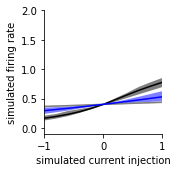

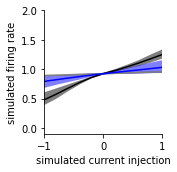

In [88]:
pct_l,pct_u = 16,84
for istim,title in zip([0,5],['0% contrast','5$^o$ size, 100% contrast']):
    plt.figure(figsize=(2.5,2.5))
#     plt.plot(opto_levels,np.nanmean(cell_intrinsic_resp,0)[:,istim,itype],c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
#     plt.fill_between(opto_levels,np.nanpercentile(cell_intrinsic_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(cell_intrinsic_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
    plt.plot(opto_levels,np.nanmean(network_resp,0)[:,istim,itype],c='k',label='baseline')
    plt.fill_between(opto_levels,np.nanpercentile(network_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
    plt.plot(opto_levels,np.nanmean(network_resp_no_pcpc,0)[:,istim,itype],c=np.array((0.5,0.5,0.5)),label='PC$\leftrightarrow$PC weights deleted')
    plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcpc,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcpc,pct_u,axis=0)[:,istim,itype],facecolor=np.array((0.5,0.5,0.5)),label='PC$\leftrightarrow$PC weights deleted',alpha=0.5)
    
    plt.plot(opto_levels,np.nanmean(network_resp_no_pcpv,0)[:,istim,itype],c=np.array((0,0,1)),label='PC$\leftrightarrow$PC weights deleted')
    plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcpv,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcpv,pct_u,axis=0)[:,istim,itype],facecolor=np.array((0,0,1)),label='PC$\leftrightarrow$PC weights deleted',alpha=0.5)
    
    # plt.legend()
    plt.xlim((-1,1))
    plt.ylim((-0.1,2))
    ut.erase_top_right()
    plt.xlabel('simulated current injection')
    plt.ylabel('simulated firing rate')
    # plt.title('PC$\leftrightarrow$PC weights deleted')
    plt.tight_layout()
#     plt.savefig('figures/network_nonlinearity_w_and_wo_wpcpc_stim_%d_no_title.jpg'%istim,dpi=300)
#     plt.title(title)
    plt.tight_layout()
#     plt.savefig('figures/network_nonlinearity_w_and_wo_wpcpc_stim_%d.jpg'%istim,dpi=300)


/Users/agos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
/Users/agos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
/Users/agos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
/Users/agos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


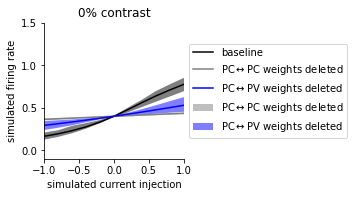

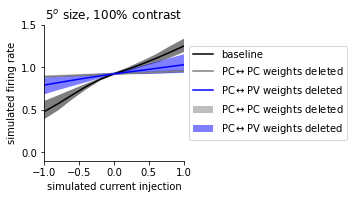

In [93]:
pct_l,pct_u = 16,84
xlims = [(0.3,0.7),(0.7,1.3)]
ylims = [(0.2,0.6),(0.6,1.3)]
for istim,title,xlim,ylim in zip([0,5],['0% contrast','5$^o$ size, 100% contrast'],xlims,ylims):
    plt.figure(figsize=(2.5,2.5))
#     plt.plot(opto_levels,np.nanmean(cell_intrinsic_resp,0)[:,istim,itype],c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
#     plt.fill_between(opto_levels,np.nanpercentile(cell_intrinsic_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(cell_intrinsic_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
    plt.plot(opto_levels,np.nanmean(network_resp,0)[:,istim,itype],c='k',label='baseline')
    plt.fill_between(opto_levels,np.nanpercentile(network_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
    plt.plot(opto_levels,np.nanmean(network_resp_no_pcpc,0)[:,istim,itype],c=np.array((0.5,0.5,0.5)),label='PC$\leftrightarrow$PC weights deleted')
    plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcpc,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcpc,pct_u,axis=0)[:,istim,itype],facecolor=np.array((0.5,0.5,0.5)),label='PC$\leftrightarrow$PC weights deleted',alpha=0.5)
    
    plt.plot(opto_levels,np.nanmean(network_resp_no_pcpv,0)[:,istim,itype],c=np.array((0,0,1)),label='PC$\leftrightarrow$PV weights deleted')
    plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcpv,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcpv,pct_u,axis=0)[:,istim,itype],facecolor=np.array((0,0,1)),label='PC$\leftrightarrow$PV weights deleted',alpha=0.5)
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.xlim(xlim)
#     plt.ylim(ylim)
    plt.xlim((-1,1))
    plt.ylim((-0.1,1.5))
    ut.erase_top_right()
    plt.xlabel('simulated current injection')
    plt.ylabel('simulated firing rate')
    # plt.title('PC$\leftrightarrow$PC weights deleted')
    plt.tight_layout()
#     plt.savefig('figures/network_nonlinearity_w_and_wo_wpcpv_stim_%d_no_title.jpg'%istim,dpi=300)
    plt.title(title)
    plt.tight_layout()
#     plt.savefig('figures/network_nonlinearity_w_and_wo_wpcpv_stim_%d.jpg'%istim,dpi=300)


In [90]:
np.digitize(mdls[0].XX[:,0],opto_levels)

array([13, 14, 14, 14, 15, 15, 13, 13, 14, 14, 14, 15, 13, 13, 14, 14, 15,
       15, 13, 14, 14, 14, 15, 15, 13, 14, 14, 14, 14, 14, 13, 14, 14, 14,
       14, 14])

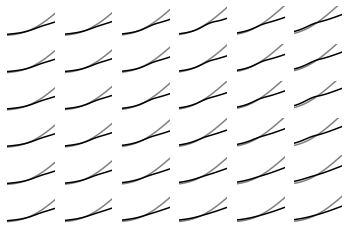

In [91]:
ibaseline = 15
ilow = 10#12
ihigh = 20#18
itype = 0
dr,dr_intrinsic,dr_up,dr_down = [np.zeros((nwt,6,6)) for ivar in range(4)]

def compute_dr(network_resp,iopto,ibaseline,itype=0):
    dr = np.reshape(network_resp[:,iopto,:,itype] - network_resp[:,ibaseline,:,itype],(nwt,6,6))
    return dr

dr = compute_dr(network_resp,ibaseline+1,ibaseline-1)#np.reshape(network_resp[:,ibaseline+1,:,itype]-network_resp[:,ibaseline-1,:,itype],(nwt,6,6))
dr_intrinsic = compute_dr(cell_intrinsic_resp,ibaseline+1,ibaseline-1)#np.reshape(cell_intrinsic_resp[:,ibaseline+1,:,itype]-cell_intrinsic_resp[:,ibaseline-1,:,itype],(nwt,6,6))
dr_up = compute_dr(network_resp,ihigh,ibaseline)# np.reshape(network_resp[:,ihigh,:,itype] - network_resp[:,ibaseline,:,itype],(nwt,6,6))
dr_down = compute_dr(network_resp,ilow,ibaseline)# np.reshape(network_resp[:,ilow,:,itype] - network_resp[:,ibaseline,:,itype],(nwt,6,6))

plt.figure()
for istim in range(this_mdl[iwt].nN):
    plt.subplot(6,6,istim+1)

    plt.plot(opto_levels,np.nanmean(cell_intrinsic_resp[:,:,istim,itype],0),c=np.array((0.5,0.5,0.5)))
    plt.plot(opto_levels,np.nanmean(network_resp[:,:,istim,itype],0),c='k')
    plt.xlim((-1.5,1.5))
    plt.ylim((-0.1,2))
#     plt.axvline(0,c='k',linestyle='dashed')
    ut.erase_top_right()
    plt.axis('off')
#     plt.xlabel('simulated current injection')
#     plt.ylabel('simulated firing rate')
#     plt.title('PC$\leftrightarrow$PC weights deleted')
#     plt.tight_layout()
# plt.savefig('figures/intrinsic_vs_network_nonlinearity_no_wpcpc.eps')

In [94]:
import sim_utils
def this_gen_size_tuning(flsc):
    shp = flsc.shape
    rflsc = flsc.reshape((shp[0]*shp[1],shp[2],shp[3]))
    size_tuning = sim_utils.gen_size_tuning(rflsc).reshape((shp[0],shp[1],shp[2]+1,shp[3]))
    return size_tuning

(76, 7, 6)
(76, 7, 6)


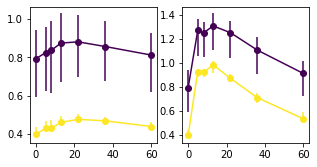

In [96]:
usize = np.array((5,8,13,22,36,60))
usize0 = np.array((0,5,8,13,22,36,60))
ilights = [ibaseline,ibaseline-5]
nlights = len(ilights)
plt.figure(figsize=(5,2.5))
for iicontrast,icontrast in enumerate([1,5]):
    plt.subplot(1,2,iicontrast+1)
    ydata = this_gen_size_tuning(network_resp[:,ilights][:,:,:,itype].reshape((nwt,nlights,6,6)))[:,:,:,icontrast]
    ut.plot_pct_errorbars_hillel(usize0,ydata)
#     plt.ylim((0,1.1))


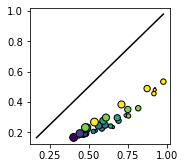

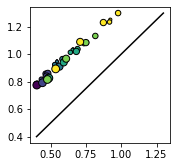

In [97]:
ibaseline = 10
ilow = 5
ihigh = 15
plt.figure(figsize=(2.5,2.5))
xdata = network_resp[:,ibaseline,:,itype].reshape((-1,6,6))
ydata = network_resp[:,ilow,:,itype].reshape((-1,6,6))
sca.scatter_size_contrast_errorbar(xdata,ydata)

plt.figure(figsize=(2.5,2.5))
xdata = network_resp[:,ibaseline,:,itype].reshape((-1,6,6))
ydata = network_resp[:,ihigh,:,itype].reshape((-1,6,6))
sca.scatter_size_contrast_errorbar(xdata,ydata)

In [ ]:
opto_levels[[7,10,13]]

0.04691890758042757
0.08734641246893078


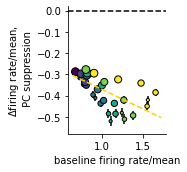

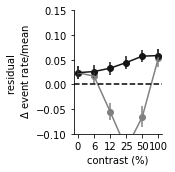

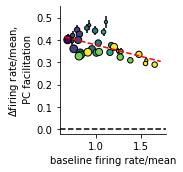

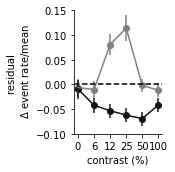

In [100]:
ibaseline = 10
ilow = 7
ihigh = 13
# ibaseline = 1
# ilow = 0
# ihigh = 2

ucontrast = np.array((0,6,12,25,50,100))
usize = np.array((5,8,13,25,36,60))
this_nsize = len(usize)
this_ncontrast = len(ucontrast)
cfrac = np.linspace(1,0,this_nsize+1)[:-1]
c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))

import scipy.stats as sst

light_lbls = ['suppression','facilitation']

cs = [np.array((1,0.8,0)),np.array((1,0,0))]

ylims = [np.array((-0.58,0.02)),np.array((-0.02,0.55))]

xdata = network_resp[:,ibaseline,:,itype].reshape((-1,6,6))
xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
for ilight,light_lbl,c,ylim in zip([ilow,ihigh],light_lbls,cs,ylims):

    plt.figure(figsize=(2.5,2.5))
    ydata = network_resp[:,ilight,:,itype].reshape((-1,6,6))
    ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
    sca.scatter_size_contrast_errorbar(xdata_norm,ydata_norm-xdata_norm,equality_line=False,square=False)
    plt.axhline(0,c='k',linestyle='dashed')
#     ut.zero_origin('x')
    plt.xlabel('baseline firing rate/mean')
    plt.ylabel('$\Delta$firing rate/mean, \n PC %s'%light_lbl)
    slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_norm.flatten(), (ydata_norm-xdata_norm).flatten())
    xs = np.array((xdata_norm.min(),xdata_norm.max()))
    plt.plot(xs,slope*xs+intercept,c=c,linestyle='dashed')
    plt.ylim(ylim)
    ut.erase_top_right()
    plt.tight_layout()
#     plt.savefig('figures/delta_rate_vs_rate_l4_%s.eps'%light_lbl)
    
    plt.figure(figsize=(2.5,2.5))
    pred = slope*xdata_norm + intercept
    actual = (ydata_norm-xdata_norm)
    residual = actual - pred
    these_sizes = [0,5]
    ut.plot_bootstrapped_errorbars_hillel(np.arange(6),actual[:,these_sizes]-pred[:,these_sizes],colors=c_l23[these_sizes],pct=(16,84))
    plt.axhline(0,c='k',linestyle='dashed')
    plt.xticks(np.arange(this_ncontrast),ucontrast)
    ut.erase_top_right()
    plt.xlabel('contrast (%)')
    plt.ylabel('residual \n $\Delta$ event rate/mean')
    plt.ylim((-0.1,0.15))
    plt.tight_layout()
#     plt.savefig('figures/residual_delta_rate_vs_contrast_l4_%s.eps'%light_lbl)

# plt.figure(figsize=(2.5,2.5))
# xdata = network_resp[:,ibaseline,:,itype].reshape((-1,6,6))
# ydata = network_resp[:,ihigh,:,itype].reshape((-1,6,6))
# sca.scatter_size_contrast_errorbar(xdata,ydata-xdata,equality_line=False,square=False)
# plt.axhline(0,c='k',linestyle='dashed')
# ut.zero_origin('x')


0.04691890758042757
0.08734641246893078


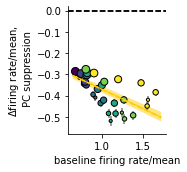

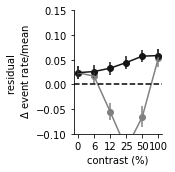

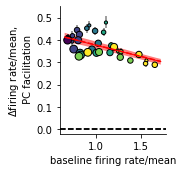

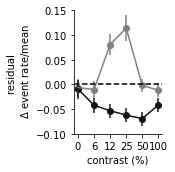

In [103]:
ibaseline = 10
ilow = 7
ihigh = 13
# ibaseline = 1
# ilow = 0
# ihigh = 2

ucontrast = np.array((0,6,12,25,50,100))
usize = np.array((5,8,13,25,36,60))
this_nsize = len(usize)
this_ncontrast = len(ucontrast)
cfrac = np.linspace(1,0,this_nsize+1)[:-1]
c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))

import scipy.stats as sst
import opto_utils
reload(opto_utils)
reload(sca)

light_lbls = ['suppression','facilitation']

cs = [np.array((1,0.8,0)),np.array((1,0,0))]

ylims = [np.array((-0.58,0.02)),np.array((-0.02,0.55))]

xdata = network_resp[:,ibaseline,:,itype].reshape((-1,6,6))
xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
for ilight,light_lbl,c,ylim in zip([ilow,ihigh],light_lbls,cs,ylims):

    plt.figure(figsize=(2.5,2.5))
    ydata = network_resp[:,ilight,:,itype].reshape((-1,6,6))
    ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
    opto_utils.scatter_size_contrast_x_dx_errorbar(np.concatenate((xdata_norm[:,:,:,np.newaxis],ydata_norm[:,:,:,np.newaxis]),axis=-1),opto_color=c)
    plt.axhline(0,c='k',linestyle='dashed')
#     ut.zero_origin('x')
    plt.xlabel('baseline firing rate/mean')
    plt.ylabel('$\Delta$firing rate/mean, \n PC %s'%light_lbl)
    slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_norm.flatten(), (ydata_norm-xdata_norm).flatten())
    xs = np.array((xdata_norm.min(),xdata_norm.max()))
    plt.plot(xs,slope*xs+intercept,c=c,linestyle='dashed')
    plt.ylim(ylim)
    ut.erase_top_right()
    plt.tight_layout()
#     plt.savefig('figures/delta_rate_vs_rate_l4_%s.jpg'%light_lbl,dpi=300)
    
    plt.figure(figsize=(2.5,2.5))
    pred = slope*xdata_norm + intercept
    actual = (ydata_norm-xdata_norm)
    residual = actual - pred
    these_sizes = [0,5]
    ut.plot_bootstrapped_errorbars_hillel(np.arange(6),actual[:,these_sizes]-pred[:,these_sizes],colors=c_l23[these_sizes],pct=(16,84))
    plt.axhline(0,c='k',linestyle='dashed')
    plt.xticks(np.arange(this_ncontrast),ucontrast)
    ut.erase_top_right()
    plt.xlabel('contrast (%)')
    plt.ylabel('residual \n $\Delta$ event rate/mean')
    plt.ylim((-0.1,0.15))
    plt.tight_layout()
#     plt.savefig('figures/residual_delta_rate_vs_contrast_l4_%s.eps'%light_lbl)

# plt.figure(figsize=(2.5,2.5))
# xdata = network_resp[:,ibaseline,:,itype].reshape((-1,6,6))
# ydata = network_resp[:,ihigh,:,itype].reshape((-1,6,6))
# sca.scatter_size_contrast_errorbar(xdata,ydata-xdata,equality_line=False,square=False)
# plt.axhline(0,c='k',linestyle='dashed')
# ut.zero_origin('x')


In [102]:
xdata_norm.shape

(38, 6, 6)

In [ ]:
actual.shape

In [ ]:
network_resp_no_pcvip.shape

0.06922159995628702
0.029471028292511928


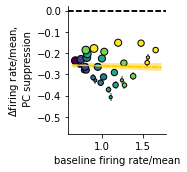

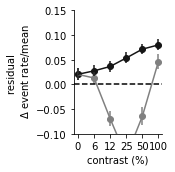

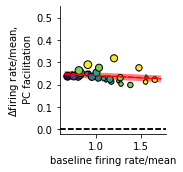

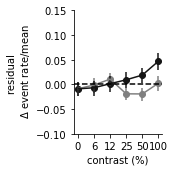

In [104]:
ibaseline = 1
ilow = 0
ihigh = 2
# ibaseline = 1
# ilow = 0
# ihigh = 2

import scipy.stats as sst

light_lbls = ['suppression','facilitation']

cs = [np.array((1,0.8,0)),np.array((1,0,0))]

ylims = [np.array((-0.58,0.02)),np.array((-0.02,0.55))]

xdata = network_resp_no_pcvip[:,ibaseline,:,itype].reshape((-1,6,6))
xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
for ilight,light_lbl,c,ylim in zip([ilow,ihigh],light_lbls,cs,ylims):

    plt.figure(figsize=(2.5,2.5))
    ydata = network_resp_no_pcvip[:,ilight,:,itype].reshape((-1,6,6))
    ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
#     sca.scatter_size_contrast_errorbar(xdata_norm,ydata_norm-xdata_norm,equality_line=False,square=False)
    opto_utils.scatter_size_contrast_x_dx_errorbar(np.concatenate((xdata_norm[:,:,:,np.newaxis],ydata_norm[:,:,:,np.newaxis]),axis=-1),opto_color=c)
    plt.axhline(0,c='k',linestyle='dashed')
#     ut.zero_origin('x')
    plt.xlabel('baseline firing rate/mean')
    plt.ylabel('$\Delta$firing rate/mean, \n PC %s'%light_lbl)
    slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_norm.flatten(), (ydata_norm-xdata_norm).flatten())
    xs = np.array((xdata_norm.min(),xdata_norm.max()))
    plt.plot(xs,slope*xs+intercept,c=c,linestyle='dashed')
    plt.ylim(ylim)
    ut.erase_top_right()
    plt.tight_layout()
#     plt.savefig('figures/delta_rate_vs_rate_l4_no_wpcvip_%s.eps'%light_lbl)
#     plt.savefig('figures/delta_rate_vs_rate_l4_no_wpcvip_%s.jpg'%light_lbl,dpi=300)
    
    plt.figure(figsize=(2.5,2.5))
    pred = slope*xdata_norm + intercept
    actual = (ydata_norm-xdata_norm)
    residual = actual - pred
    these_sizes = [0,5]
    ut.plot_bootstrapped_errorbars_hillel(np.arange(6),actual[:,these_sizes]-pred[:,these_sizes],colors=c_l23[these_sizes],pct=(16,84))
    plt.axhline(0,c='k',linestyle='dashed')
    plt.xticks(np.arange(this_ncontrast),ucontrast)
    ut.erase_top_right()
    plt.xlabel('contrast (%)')
    plt.ylabel('residual \n $\Delta$ event rate/mean')
    plt.ylim((-0.1,0.15))
    plt.tight_layout()
#     plt.savefig('figures/residual_delta_rate_vs_contrast_no_wpcvip_l4_%s.eps'%light_lbl)
    

# plt.figure(figsize=(2.5,2.5))
# xdata = network_resp[:,ibaseline,:,itype].reshape((-1,6,6))
# ydata = network_resp[:,ihigh,:,itype].reshape((-1,6,6))
# sca.scatter_size_contrast_errorbar(xdata,ydata-xdata,equality_line=False,square=False)
# plt.axhline(0,c='k',linestyle='dashed')
# ut.zero_origin('x')


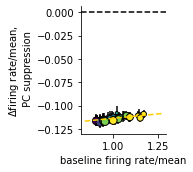

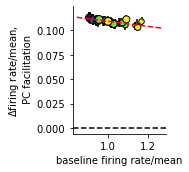

In [105]:
ibaseline = 1
ilow = 0
ihigh = 2
# ibaseline = 1
# ilow = 0
# ihigh = 2

import scipy.stats as sst

light_lbls = ['suppression','facilitation']

cs = [np.array((1,0.8,0)),np.array((1,0,0))]

xdata = network_resp_vip_sil[:,ibaseline,:,itype].reshape((-1,6,6))
xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
for ilight,light_lbl,c in zip([ilow,ihigh],light_lbls,cs):

    plt.figure(figsize=(2.5,2.5))
    ydata = network_resp_vip_sil[:,ilight,:,itype].reshape((-1,6,6))
    ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
    sca.scatter_size_contrast_errorbar(xdata_norm,ydata_norm-xdata_norm,equality_line=False,square=False)
    plt.axhline(0,c='k',linestyle='dashed')
#     ut.zero_origin('x')
    plt.xlabel('baseline firing rate/mean')
    plt.ylabel('$\Delta$firing rate/mean, \n PC %s'%light_lbl)
    slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_norm.flatten(), (ydata_norm-xdata_norm).flatten())
    xs = np.array((xdata_norm.min(),xdata_norm.max()))
    plt.plot(xs,slope*xs+intercept,c=c,linestyle='dashed')
    ut.erase_top_right()
    plt.tight_layout()
#     plt.savefig('figures/delta_rate_vs_rate_l4_%s.eps'%light_lbl)
    

# plt.figure(figsize=(2.5,2.5))
# xdata = network_resp[:,ibaseline,:,itype].reshape((-1,6,6))
# ydata = network_resp[:,ihigh,:,itype].reshape((-1,6,6))
# sca.scatter_size_contrast_errorbar(xdata,ydata-xdata,equality_line=False,square=False)
# plt.axhline(0,c='k',linestyle='dashed')
# ut.zero_origin('x')


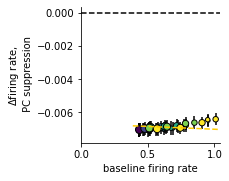

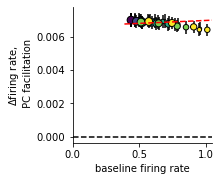

In [106]:
ibaseline = 15
ilow = 14
ihigh = 16

import scipy.stats as sst

light_lbls = ['suppression','facilitation']

cs = [np.array((1,0.8,0)),np.array((1,0,0))]

xdata = network_resp_no_pcpc[:,ibaseline,:,itype].reshape((-1,6,6))
for ilight,light_lbl,c in zip([ilow,ihigh],light_lbls,cs):

    plt.figure(figsize=(2.5,2.5))
    ydata = network_resp_no_pcpc[:,ilight,:,itype].reshape((-1,6,6))
    sca.scatter_size_contrast_errorbar(xdata,ydata-xdata,equality_line=False,square=False)
    plt.axhline(0,c='k',linestyle='dashed')
    ut.zero_origin('x')
    plt.xlabel('baseline firing rate')
    plt.ylabel('$\Delta$firing rate, \n PC %s'%light_lbl)
    slope, intercept, r_value, p_value, std_err = sst.linregress(xdata.flatten(), (ydata-xdata).flatten())
    xs = np.array((xdata.min(),xdata.max()))
    plt.plot(xs,slope*xs+intercept,c=c,linestyle='dashed')
    ut.erase_top_right()
#     plt.savefig('figures/delta_rate_vs_rate_pc_%s.eps')
    

# plt.figure(figsize=(2.5,2.5))
# xdata = network_resp[:,ibaseline,:,itype].reshape((-1,6,6))
# ydata = network_resp[:,ihigh,:,itype].reshape((-1,6,6))
# sca.scatter_size_contrast_errorbar(xdata,ydata-xdata,equality_line=False,square=False)
# plt.axhline(0,c='k',linestyle='dashed')
# ut.zero_origin('x')


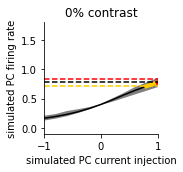

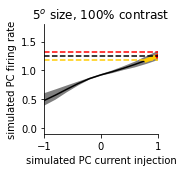

In [108]:
for istim,title in zip([0,5],['0% contrast','5$^o$ size, 100% contrast']):
    plt.figure(figsize=(2.5,2.5))
#     plt.plot(opto_levels,np.nanmean(cell_intrinsic_resp,0)[:,istim,itype],c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
    plt.plot(opto_levels,np.nanmean(network_resp,0)[:,istim,itype],c='k',label='baseline')
    lb,ub = [np.nanpercentile(network_resp[:,:,istim,itype],pct,axis=0) for pct in [pct_l,pct_u]]
    plt.fill_between(opto_levels,lb,ub,facecolor='k',alpha=0.5)
#     plt.fill_between(opto_levels[ilow:ibaseline+1],lb[ilow:ibaseline+1],ub[ilow:ibaseline+1],facecolor=np.array((1,0.8,0)))
    plt.plot(opto_levels[ilow:ibaseline+1],np.nanmean(network_resp,0)[:,istim,itype][ilow:ibaseline+1],c=np.array((1,0.8,0)),label='baseline',linewidth=4)
    plt.plot(opto_levels[ibaseline:ihigh+1],np.nanmean(network_resp,0)[:,istim,itype][ibaseline:ihigh+1],c=np.array((1,0,0)),label='baseline',linewidth=4)
#     plt.axvline(0,c='k',linestyle='dashed')
#     plt.axhline(0,c='k',linestyle='dashed')
    plt.axhline(np.nanmean(network_resp,0)[:,istim,itype][ibaseline],c='k',linestyle='dashed')
    plt.axhline(np.nanmean(network_resp,0)[:,istim,itype][ilow],c=np.array((1,0.8,0)),linestyle='dashed')
    plt.axhline(np.nanmean(network_resp,0)[:,istim,itype][ihigh],c=np.array((1,0,0)),linestyle='dashed')
#     plt.axvline(opto_levels[ilow],c=np.array((1,0.8,0)))
#     plt.axvline(opto_levels[ihigh],c=np.array((1,0,0)))

    #     plt.plot(opto_levels,np.nanmean(network_resp_no_pcpc,0)[:,istim,itype],c=np.array((0.5,0.5,0.5)),label='PC$\leftrightarrow$PC weights deleted')
    # plt.legend()
    plt.xlim((-1,1))
    plt.ylim((-0.1,1.8))
    ut.erase_top_right()
    plt.xlabel('simulated PC current injection')
    plt.ylabel('simulated PC firing rate')
    # plt.title('PC$\leftrightarrow$PC weights deleted')
    plt.title(title)
    plt.tight_layout()
#     plt.savefig('figures/network_nonlinearity_l4_%d_opto_colors.jpg'%istim,dpi=300)

In [ ]:
network_resp.shape

In [ ]:
ub

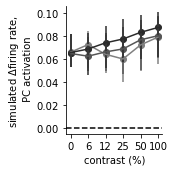

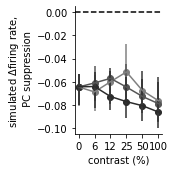

In [109]:
dr_up = compute_dr(network_resp_no_pcpv,ihigh,ibaseline)
dr_down = compute_dr(network_resp_no_pcpv,ilow,ibaseline)

dr_up = compute_dr(network_resp,ihigh,ibaseline)
dr_down = compute_dr(network_resp,ilow,ibaseline)

isizes = [0,2,4]
this_nsize = len(isizes)
cfrac = np.linspace(1,0,this_nsize+1)[:-1]
c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))
ucontrast = np.array((0,6,12,25,50,100))

plt.figure(figsize=(2.5,2.5))
ut.plot_pct_errorbars_hillel(np.arange(6),dr_up[:,isizes],pct=(16,84),colors=c_l23)
ut.erase_top_right()
plt.xticks(np.arange(6),ucontrast)
plt.axhline(0,c='k',linestyle='dashed')
plt.xlabel('contrast (%)')
plt.ylabel('simulated $\Delta$firing rate, \n PC activation')
plt.tight_layout()
# plt.savefig('figures/sim_pc_activation_size_contrast.eps')

plt.figure(figsize=(2.5,2.5))
ut.plot_pct_errorbars_hillel(np.arange(6),dr_down[:,isizes],pct=(16,84),colors=c_l23)
ut.erase_top_right()
plt.xticks(np.arange(6),ucontrast)
plt.axhline(0,c='k',linestyle='dashed')
plt.xlabel('contrast (%)')
plt.ylabel('simulated $\Delta$firing rate, \n PC suppression')
plt.tight_layout()
# plt.savefig('figures/sim_pc_suppression_size_contrast.eps')

IndexError: index 25 is out of bounds for axis 1 with size 21

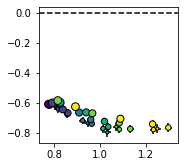

<Figure size 180x180 with 0 Axes>

In [110]:
ilight_halo = 5
ilight_chrimson = 25
ilight_off = 15

itype = 0
for ilight_light in [ilight_halo,ilight_chrimson]:
    plt.figure(figsize=(2.5,2.5))
    xdata = network_resp[:,ilight_off,:,itype].reshape((-1,6,6))
    ydata = network_resp[:,ilight_light,:,itype].reshape((-1,6,6))
    sca.scatter_size_contrast_errorbar(xdata,ydata-xdata,equality_line=False,square=False)
    plt.axhline(0,c='k',linestyle='dashed')

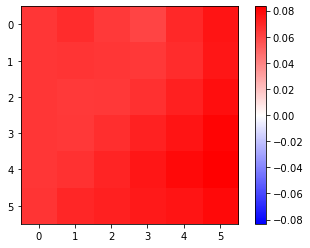

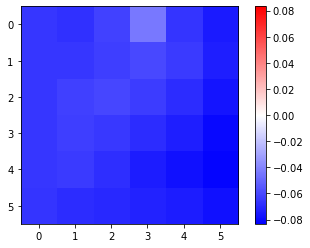

In [111]:
mx = np.maximum(np.max(np.abs(np.nanmean(dr_up,0))),np.max(np.abs(np.nanmean(dr_down,0))))
plt.figure()
ut.imshow_hot_cold(np.nanmean(dr_up,0),mx=mx)
plt.colorbar()
plt.figure()
ut.imshow_hot_cold(np.nanmean(dr_down,0),mx=mx)
plt.colorbar()

In [112]:
network_resp.shape

(38, 21, 36, 8)

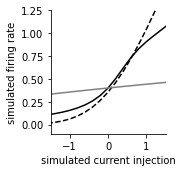

In [113]:
iwt = 0
istim = 0
itype = 0
this_mdl,this_YY = mdls_no_pcpc.copy(),YY_opto_no_pcpc.copy()
# this_mdl,this_YY = mdls_no_pcpv.copy(),YY_opto_no_pcpv.copy()
# this_mdl,this_YY = mdls.copy(),YY_opto.copy()
network_resp = np.nanmean(YY_opto[iwt][:,istim,:,itype],1)
network_resp_no_pcpc = np.nanmean(YY_opto_no_pcpc[iwt][:,istim,:,itype],1)

cell_intrinsic_resp = np.zeros_like(opto_levels)
for ilevel in range(opto_levels.shape[0]):
    cell_intrinsic_resp[ilevel] = this_mdl[iwt].compute_f_(opto_levels[ilevel]+this_mdl[iwt].Eta,this_mdl[iwt].Xi,this_mdl[iwt].s02)[istim,itype]

plt.figure(figsize=(2.5,2.5))
plt.plot(opto_levels,cell_intrinsic_resp,c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
plt.plot(opto_levels,network_resp,c='k',label='baseline')
plt.plot(opto_levels,network_resp_no_pcpc,c=np.array((0.5,0.5,0.5)),label='PC$\leftrightarrow$PC weights deleted')
# plt.legend()
plt.xlim((-1.5,1.5))
plt.ylim((-0.1,1.25))
ut.erase_top_right()
plt.xlabel('simulated current injection')
plt.ylabel('simulated firing rate')
# plt.title('PC$\leftrightarrow$PC weights deleted')
plt.tight_layout()
# plt.savefig('figures/network_nonlinearity_w_and_wo_wpcpc.eps')

/Users/agos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/agos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/agos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlie

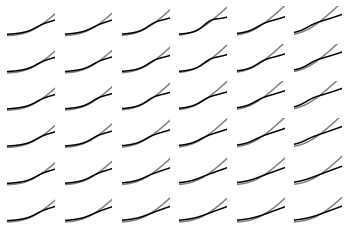

In [114]:
iwt = 0
istim = 0
itype = 0
ibaseline = 15
ilow = 10
ihigh = 20
# this_mdl,this_YY = mdls_no_pcpc.copy(),YY_opto_no_pcpc.copy()
# this_mdl,this_YY = mdls_no_pcpv.copy(),YY_opto_no_pcpv.copy()
this_mdl,this_YY = mdls.copy(),YY_opto.copy()
dr,dr_intrinsic,dr_up,dr_down = [np.zeros((6,6)) for ivar in range(4)]
plt.figure()
for istim in range(this_mdl[iwt].nN):
    network_resp = np.nanmean(this_YY[iwt][:,istim,:,itype],1)

    cell_intrinsic_resp = np.zeros_like(opto_levels)
    for ilevel in range(opto_levels.shape[0]):
        cell_intrinsic_resp[ilevel] = this_mdl[iwt].compute_f_(opto_levels[ilevel]+this_mdl[iwt].Eta,this_mdl[iwt].Xi,this_mdl[iwt].s02)[istim,itype]

    # plt.figure(figsize=(2.5,2.5))
        plt.subplot(6,6,istim+1)
    dr[np.unravel_index(istim,(6,6))] = (network_resp[ibaseline+1]-network_resp[ibaseline-1])
    dr_intrinsic[np.unravel_index(istim,(6,6))] = (cell_intrinsic_resp[ibaseline+1]-cell_intrinsic_resp[ibaseline-1])
    dr_up[np.unravel_index(istim,(6,6))] = network_resp[ihigh] - network_resp[ibaseline]
    dr_down[np.unravel_index(istim,(6,6))] = network_resp[ilow] - network_resp[ibaseline]

    plt.plot(opto_levels,cell_intrinsic_resp,c=np.array((0.5,0.5,0.5)))
    plt.plot(opto_levels,network_resp,c='k')
    plt.xlim((-1.5,1.5))
    plt.ylim((-0.1,2))
#     plt.axvline(0,c='k',linestyle='dashed')
    ut.erase_top_right()
    plt.axis('off')
#     plt.xlabel('simulated current injection')
#     plt.ylabel('simulated firing rate')
#     plt.title('PC$\leftrightarrow$PC weights deleted')
#     plt.tight_layout()
# plt.savefig('figures/intrinsic_vs_network_nonlinearity_no_wpcpc.eps')

In [115]:
dr_up.shape

(6, 6)

In [117]:
# mx = np.maximum(np.max(np.abs(np.nanmean(dr_up,0))),np.max(np.abs(np.nanmean(dr_down,0))))
# plt.figure()
# ut.imshow_hot_cold(np.nanmean(dr_up,0),mx=mx)
# plt.colorbar()
# plt.figure()
# ut.imshow_hot_cold(np.nanmean(dr_down,0),mx=mx)
# plt.colorbar()

In [ ]:
np.max(dr.flatten())/np.min(dr.flatten())

In [ ]:
np.max(dr_intrinsic.flatten())/np.min(dr_intrinsic.flatten())

In [ ]:
# nwt = 20
# YY_opto = YY_opto[:nwt]
# YY_ss = YY_ss[:nwt]

In [ ]:
# ut.mkdir('../shared_data/calnet_data/dynamics/')
# np.save('../shared_data/calnet_data/dynamics/200724a.npy',YY_opto)
# YY_opto = np.load('../shared_data/calnet_data/dynamics/200724a.npy',allow_pickle=True)[()]

In [118]:
shp = YY_opto[0].shape
YY_opto_small = np.nan*np.ones((nwt,shp[0],shp[1],shp[3]))
tlast = 3000
for iwt in range(nwt):
    if not YY_opto[iwt] is None:
        YY_opto_small[iwt] = np.nanmean(YY_opto[iwt][:,:,-tlast:,:],2)
    

In [119]:
Niter = 1001

In [120]:
shp = YY_opto[0].shape
Niter = 101
YY_opto_medium = np.nan*np.ones((nwt,shp[0],shp[1],Niter,shp[3]))
for iwt in range(nwt):
    if not YY_opto[iwt] is None:
        YY_opto_medium[iwt] = YY_opto[iwt][:,:,::10,:]
        
# Niter = 1001
# YY_opto_medium = YY_opto.copy()
    

In [121]:
# del YY_opto

In [122]:
# np.save('YY_opto_medium_200921a.npy',YY_opto_medium)
# YY_opto_medium = np.load('YY_opto_medium_200921a.npy')[()]

In [123]:
YY_opto_medium.shape

(38, 21, 36, 101, 8)

/Users/agos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


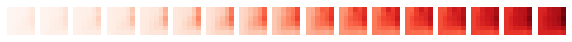

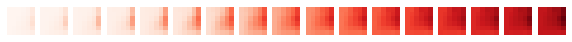

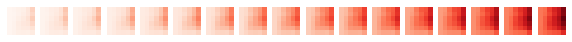

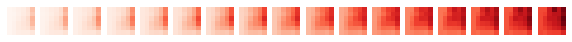

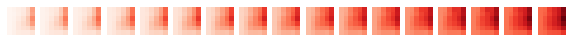

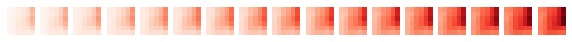

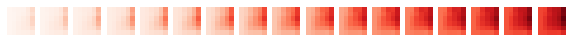

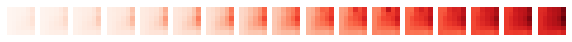

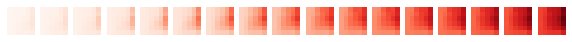

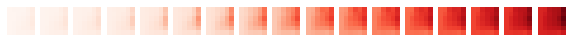

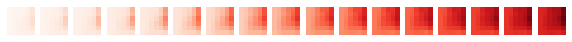

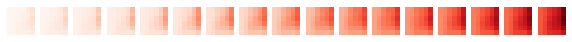

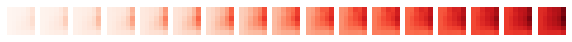

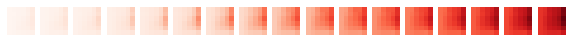

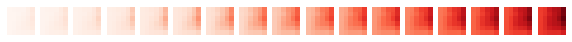

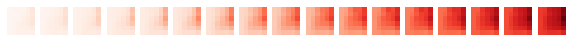

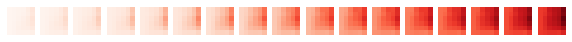

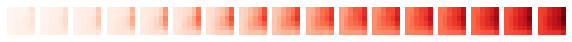

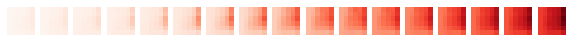

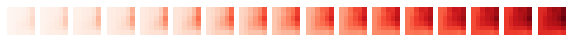

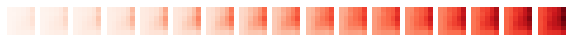

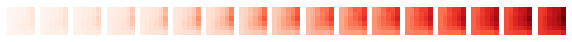

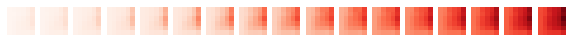

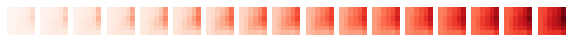

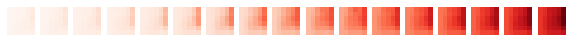

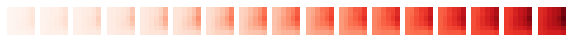

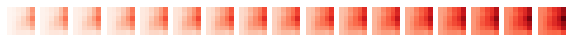

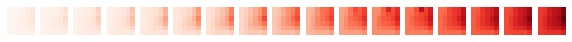

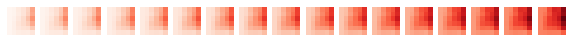

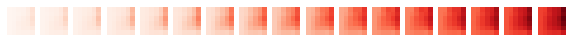

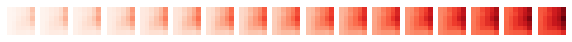

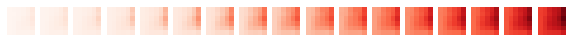

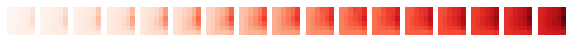

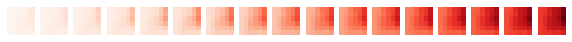

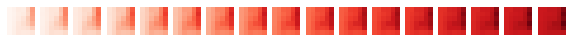

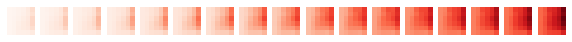

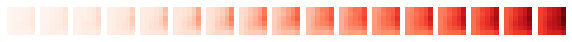

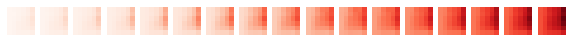

In [124]:
sc_opto = np.zeros((nwt,YY_opto_medium.shape[1],6,6))
for iwt in range(nwt):
    mag = 2
    for itype in range(1):
        plt.figure(figsize=(5*mag,mag))
        data = YY_opto_medium[iwt][:,:,:,itype].reshape((-1,6,6,Niter))
        data = np.nanmean(data[:,:,:,:],-1)
        slc = slice(2,-2)
        data = data[slc] #- data[5:6]
        sc_opto[iwt,slc] = data
        nopto = data.shape[0]
        for iopto in range(nopto):
            plt.subplot(1,nopto,iopto+1)
            plt.imshow(data[iopto],vmin=data.min(),vmax=data.max())
            plt.axis('off')

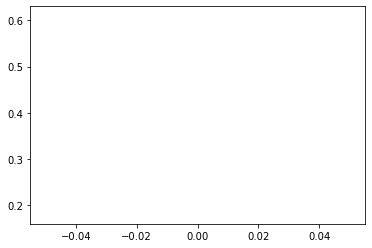

In [125]:
plt.figure()
plt.plot(YY_opto[0][:,18,:,2].T)

/Users/agos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


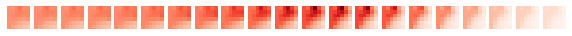

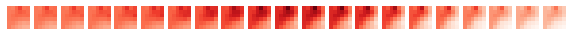

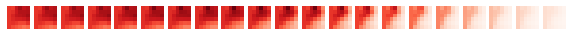

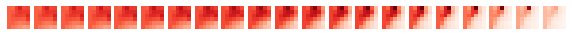

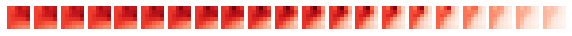

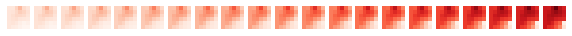

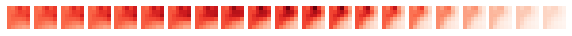

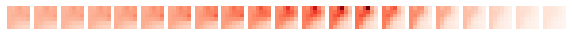

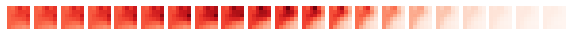

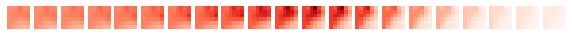

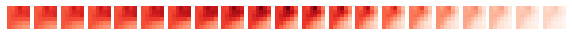

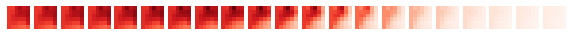

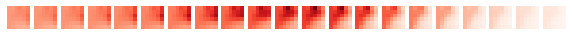

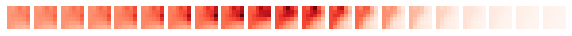

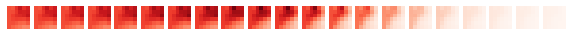

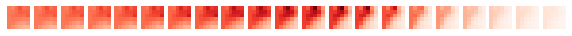

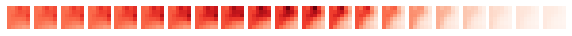

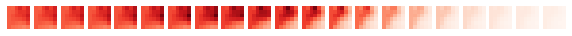

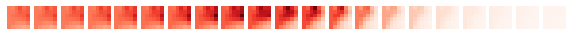

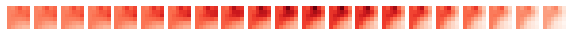

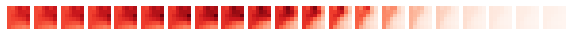

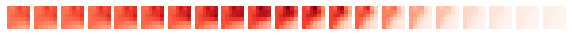

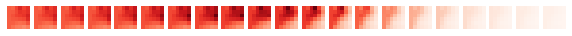

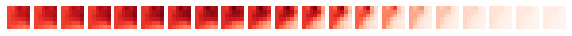

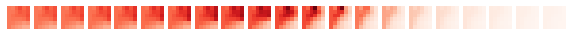

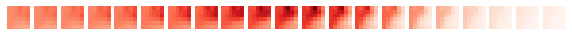

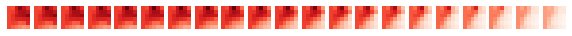

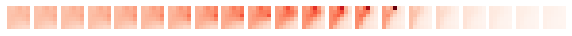

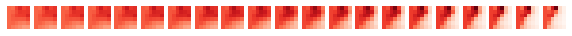

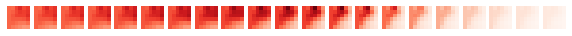

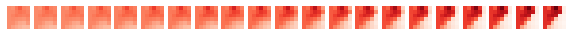

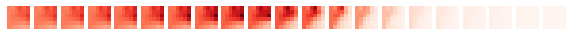

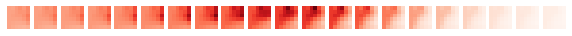

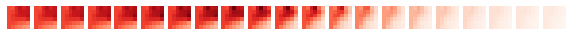

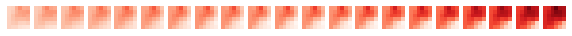

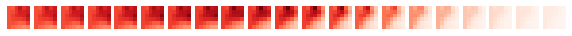

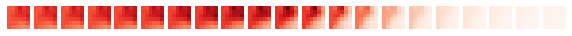

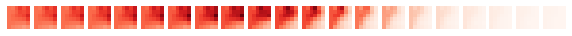

In [128]:
sc_opto = np.zeros((nwt,YY_opto_medium.shape[1],6,6))
for iwt in range(nwt):
    mag = 2
    for itype in range(2,3):
        plt.figure(figsize=(5*mag,mag))
        data = YY_opto_medium[iwt][:,:,:,itype].reshape((-1,6,6,Niter))
        data = np.nanmean(data[:,:,:,:],-1)
        data = data #- data[5:6]
        sc_opto[iwt] = data
        nopto = data.shape[0]
        for iopto in range(nopto):
            plt.subplot(1,nopto,iopto+1)
            plt.imshow(data[iopto],vmin=data.min(),vmax=data.max())
            plt.axis('off')

In [ ]:
plt.figure()
plt.imshow(YY_opto_tavg[0,8,:,:,0])
plt.figure()
plt.imshow(YY_opto_tavg[0,16,:,:,0])

In [ ]:
opto_levels[8]

In [127]:
reload(ut)
reload(sca)
lbls = ['PC','SST','VIP','PV']
opto_lbls = ['halo','chrimson']
average_last = int(np.floor(Niter/5))
nopto = len(opto_levels)
ncelltypes = YY_opto_medium[0].shape[-1]
YY_opto_tavg = amps[:,np.newaxis,np.newaxis,np.newaxis,:]*np.nanmean(YY_opto_medium[:,:,:,-average_last:,:],3).reshape((nwt,nopto,6,6,ncelltypes)) + bltiles[:,np.newaxis,np.newaxis,np.newaxis,:]
# YY_opto_tavg = np.zeros((nwt,nopto,6,6,ncelltypes))
# for iwt in range(nwt):
#     YY_opto_tavg[iwt] = amps[iwt]*np.nanmean(YY_opto_medium[iwt][:,:,:,:],2).reshape((nopto,6,6,ncelltypes)) + bltiles[iwt]
iwt = -1
ilight1 = 5
for iilight2,ilight2 in enumerate([2,10]):
    for itype in range(3):
        plt.figure(figsize=(2.5,2.5))
        xdata = YY_opto_tavg[:,ilight1,:,:,itype]
        ydata = YY_opto_tavg[:,ilight2,:,:,itype]
        sca.scatter_size_contrast_errorbar(xdata,ydata-xdata,mn=0,equality_line=False,square=False)
        ut.erase_top_right()
#         ut.zero_origin('xy')
        plt.xlabel('%s event rate, \n light off'%lbls[itype])
        plt.ylabel('%s event rate, \n light on'%lbls[itype])
        plt.tight_layout()
#         plt.savefig('figures/finite_%s_%s_scatter_light_on_light_off.eps'%(opto_lbls[iilight2],lbls[itype]))

ValueError: operands could not be broadcast together with shapes (372,1,1,1,8) (38,21,6,6,8) 

In [130]:
fit_lbl = '201128b'
npyfile = np.load(path2calnet_data+'/calnet_data/dynamics/opto_tavg_%s.npy'%fit_lbl,allow_pickle=True)[()]
shp = npyfile['YY_opto'].shape
YY_opto_tavg = npyfile['YY_opto'].reshape(shp[:2]+(6,6)+shp[3:])
weights_files = glob.glob(path2calnet_data+'/calnet_data/weights/weights_%s/*.npy'%fit_lbl)
weights_files.sort()

In [131]:
npyfile['YY_opto'].shape

(134, 21, 36, 8)

In [132]:
nwt = len(weights_files)
mdls = [None for iwt in range(nwt)]
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    mdls[iwt] = cc.ModelOri(wtdict,nT=1)

/Users/agos/Dropbox/ColumbiaProjects/Dans_Data_Package/analysis_dan/calnet/utils.py:685: RuntimeWarning: divide by zero encountered in true_divide
  u = mu/np.sqrt(2*s2)


In [133]:
opto_levels = np.linspace(-2,2,21)
nopto = opto_levels.size

In [134]:
import calnet.utils
import sim_utils
nfiles = len(weights_files)
# Ts = np.zeros((nfiles,nQ))
iwt = 0
nN,nP,nQ,nS,nT = mdls[iwt].nN,mdls[iwt].nP,mdls[iwt].nQ,mdls[iwt].nS,mdls[iwt].nT
Ks = np.zeros((nfiles,nQ))
Wmys = np.zeros((nfiles,nQ,nQ))
Wmxs = np.zeros((nfiles,nP,nQ))
s02s = np.zeros((nfiles,nQ))
YYs = np.zeros((nfiles,6,6,nQ*nS*nT))
XXs = np.zeros((nfiles,6,6,nP*nS*nT))
Etas = np.zeros((nfiles,6,6,nQ*nS*nT))
# Eta1s = np.zeros((nfiles,6,6,nQ*nS*nT))
# Eta2s = np.zeros((nfiles,6,6,nQ*nS*nT))
h1s = np.zeros((nfiles,))
h2s = np.zeros((nfiles,))
losses = np.zeros((nfiles,))
couplings = np.zeros((nfiles,nopto,6,6,nQ*nS*nT,nQ*nS*nT))
phis = np.zeros((nfiles,nopto,6,6,nQ*nS*nT))
for iwt,weights_file in enumerate(weights_files):
    Wstar_dict = np.load(weights_file,allow_pickle=True)[()]
#     Wmx,Wmy,Wsx,Wsy,s02,K,kappa,T,XX,XXp,Eta,Xi,h = Wstar_dict['as_list']
    try:
        Wmx,Wmy,Wsx,Wsy,s02,K,kappa,T,XX,XXp,Eta,Xi,h1,h2,bl = Wstar_dict['as_list']
        amp = np.ones((nQ*nS*nT,))
    except:
        Wmx,Wmy,Wsx,Wsy,s02,K,kappa,T,XX,XXp,Eta,Xi,h1,h2,bl,amp = Wstar_dict['as_list']
    losses[iwt] = Wstar_dict['loss']
#     Wmx,Wmy,Wsx,Wsy,s02,K,kappa,T,XX,XXp,Eta,Xi,h1,h2,h3,Eta1,Eta2,Eta3 = Wstar_dict['as_list']
    WWmy = calnet.utils.gen_Weight_k_kappa_t(Wmy,K,kappa,T,nS=nS,nT=nT)
    WWmx = calnet.utils.gen_Weight_k_kappa_t(Wmx,K,kappa,T,nS=nS,nT=nT)
    tiled_s02 = np.tile(s02,nS*nT)
#     Ts[iwt] = T
    Ks[iwt] = K
    Wmys[iwt] = Wmy
    Wmxs[iwt] = Wmx
    s02s[iwt] = s02
    YY0 = sim_utils.f_miller_troyer(Eta,Xi**2+tiled_s02)
    YYs[iwt] = amp*YY0.reshape((6,6,nQ*nS*nT)) + np.tile(bl,nS*nT)[np.newaxis]
    XXs[iwt] = XX.reshape((6,6,nP*nS*nT))
    Etas[iwt] = Eta.reshape((6,6,nQ*nS*nT))
    h1s[iwt] = h1
    h2s[iwt] = h2
    bltile = np.tile(bl,nS*nT)
    for ilight in range(YY_opto_tavg.shape[1]):
        this_YY = 1/amp[np.newaxis,:]*(YY_opto_tavg[iwt,ilight].reshape((nN,nQ*nS*nT)) - bltile[np.newaxis,:])
#         this_YY = YY_opto_tavg[iwt,ilight].reshape((nN,nQ*nS*nT))
        phis[iwt,ilight] = mdls[iwt].fprimeXY(mdls[iwt].XX,this_YY).reshape((6,6,nQ*nS*nT))
    for istim in range(nN):
        iistim,jjstim = np.unravel_index(istim,(6,6))
#         phis[iwt,iistim,jjstim] = calnet.utils.fprime_miller_troyer(Eta[istim],Xi[istim]**2+tiled_s02)
        for ilight in range(nopto):
            Phi = np.diag(phis[iwt,ilight,iistim,jjstim])
            couplings[iwt,ilight,iistim,jjstim] = Phi @ np.linalg.inv(np.eye(nQ*nS*nT) - WWmy @ Phi)

/Users/agos/Dropbox/ColumbiaProjects/Dans_Data_Package/analysis_dan/sim_utils.py:673: RuntimeWarning: divide by zero encountered in true_divide
  u = mu/np.sqrt(2*s2)
/Users/agos/Dropbox/ColumbiaProjects/Dans_Data_Package/analysis_dan/calnet/utils.py:696: RuntimeWarning: divide by zero encountered in true_divide
  u = mu/np.sqrt(2*s2)


/Users/agos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/Users/agos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


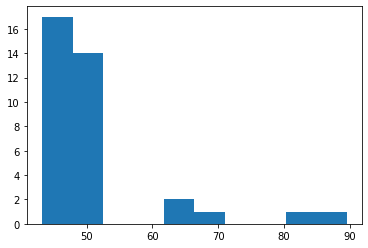

In [135]:
plt.figure()
plt.hist(losses[losses<100])
low_loss = (losses<60)

In [136]:
ilight_halo = 8
ilight_chrimson = 16
ilight_off = 10

In [139]:
top_smimi = np.array([73])
top_smimi = np.array([79, 60, 73])
top_smimi = np.array([34, 60, 73, 78, 79])
top_smimi = np.array([ 5, 19, 34, 60, 73, 78, 79, 87, 88])

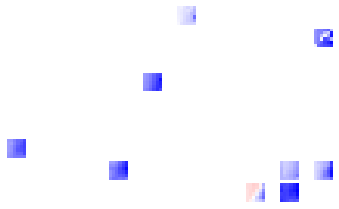

In [140]:
reload(ut)
plt.figure()
for iwt in range(nwt):
    if iwt in top_smimi:
        plt.subplot(10,10,iwt+1)
        mx = np.max(np.abs(couplings[iwt,:,:,:,4,0]))
        ut.imshow_hot_cold(couplings[iwt,ilight_off,:,:,4,0],mx=mx)
        plt.axis('off')
# plt.colorbar()

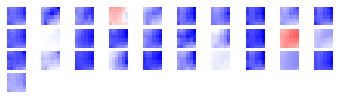

In [141]:
plt.figure()
for iwt in range(np.minimum(low_loss.sum(),100)):
    plt.subplot(10,10,iwt+1)
    mx = np.max(np.abs(couplings[low_loss][iwt,:,:,:,4,0]))
    ut.imshow_hot_cold(couplings[low_loss][iwt,ilight_off,:,:,4,0],mx=mx)
    plt.axis('off')
# plt.colorbar()

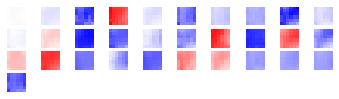

In [142]:
plt.figure()
for iwt in range(np.minimum(low_loss.sum(),100)):
    plt.subplot(10,10,iwt+1)
    mx = np.max(np.abs(couplings[low_loss][iwt,:,:,:,4,0]))
    ut.imshow_hot_cold(couplings[low_loss][iwt,ilight_chrimson,:,:,4,0],mx=mx)
    plt.axis('off')
# plt.colorbar()

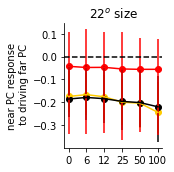

In [143]:
i,j = 4,0
plt.figure(figsize=(2.5,2.5))
ucontrast = np.array((0,6,12,25,50,100))
isize = 3
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
ut.plot_pct_errorbars_hillel(np.arange(6),couplings[low_loss][:,[ilight_halo,ilight_off,ilight_chrimson]][:,:,isize,:,i,j],pct=(16,84),colors=colors)
ut.erase_top_right()
plt.axhline(c='k',linestyle='dashed')
plt.ylabel(r'near PC response'+'\n to driving far PC')
plt.title('22$^o$ size')
plt.xticks(np.arange(6),ucontrast)
plt.tight_layout()
# plt.savefig('figures/far_pc_near_pc_coupling_sim_vip_opto.eps')


1.1831634290806285


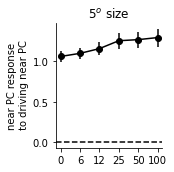

In [144]:
i,j = 0,0
plt.figure(figsize=(2.5,2.5))
ucontrast = np.array((0,6,12,25,50,100))
isize = 0
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
ut.plot_bootstrapped_errorbars_hillel(np.arange(6),couplings[low_loss][:,[ilight_off]][:,:,isize,:,i,j],pct=(16,84),colors=colors[1:2])
ut.erase_top_right()
plt.axhline(c='k',linestyle='dashed')
plt.ylabel(r'near PC response'+'\n to driving near PC')
plt.title('5$^o$ size')
plt.xticks(np.arange(6),ucontrast)
plt.tight_layout()
# plt.savefig('figures/near_pc_near_pc_coupling_sim_vip_opto.eps')


In [145]:
couplings[low_loss].shape

(31, 21, 6, 6, 8, 8)

-0.2062205211934789


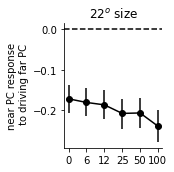

In [146]:
i,j = 4,0
plt.figure(figsize=(2.5,2.5))
isize = 3
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
ut.plot_bootstrapped_errorbars_hillel(np.arange(6),couplings[low_loss][:,[ilight_off]][:,:,isize,:,i,j],pct=(16,84),colors=colors[1:2])
ut.erase_top_right()
plt.axhline(c='k',linestyle='dashed')
plt.ylabel(r'near PC response'+'\n to driving far PC')
plt.title('22$^o$ size')
plt.xticks(np.arange(6),ucontrast)
plt.tight_layout()
# plt.savefig('figures/far_pc_near_pc_coupling.eps')


-0.08673063023351017
-0.21974372266721937
-0.07763632872456007
0.014133489825871754
-0.06588191276418146
-0.3566884968047462
-0.0009828987820603707
2.064810203000932
-0.013664659840015575
-0.16826443516555392
-0.10830531380202346
-0.17291061799260837
-0.05366744275692506
0.14689948204555728
-0.05075790473660961
-0.022325292946617264
1.3204817784150569
-0.02131238741472778
0.6423640545858257
-0.014175981198776732
-0.08598724927608452
-0.03349046362912794
-0.12121369403183385
0.05092573688045362
-0.021073470431957675
-0.06071275964523885
-0.07312313047249694
-0.18308018148017716
0.7492185366157342
-0.06604109138519518
-0.03235426550029151
-0.1817538350808672
-0.015397503316845383
-0.17279074495229535
-0.03997584628796452
0.0600451025254378
-0.0032214054258872284
-0.2943173521725739
-0.1986428559767303
-0.11664814481825272
-0.04729579363539781
-0.17910984821632203
-0.501858554069575
-0.08839291550023759
-0.0875239651296764
-0.0938758393497649
-0.2689667251825915
-0.2121072760626815
-0.070

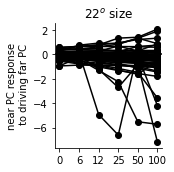

In [147]:
i,j = 4,0
plt.figure(figsize=(2.5,2.5))
isize = 3
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
for iwt in range(couplings.shape[0]):
    ut.plot_bootstrapped_errorbars_hillel(np.arange(6),couplings[iwt:iwt+1,[ilight_off]][:,:,isize,:,i,j],pct=(16,84),colors=colors[1:2])
ut.erase_top_right()
plt.axhline(c='k',linestyle='dashed')
plt.ylabel(r'near PC response'+'\n to driving far PC')
plt.title('22$^o$ size')
plt.xticks(np.arange(6),ucontrast)
plt.tight_layout()
# plt.savefig('figures/far_pc_near_pc_coupling.eps')


In [26]:
i,j = 0,0
plt.figure(figsize=(2.5,2.5))
isize = 3
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
ut.plot_bootstrapped_errorbars_hillel(np.arange(6),couplings[:,[ilight_halo,ilight_off,ilight_chrimson]][:,:,isize,:,i,j],pct=(16,84),colors=colors)
ut.erase_top_right()
plt.axhline(c='k',linestyle='dashed')
plt.ylabel(r'near PC response'+'\n to driving near PC')
plt.title('22$^o$ size')


NameError: name 'couplings' is not defined

<Figure size 180x180 with 0 Axes>

3.393969697258482


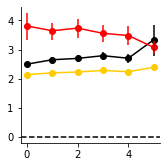

In [148]:
i,j = 0,0
plt.figure(figsize=(2.5,2.5))
iwt = 3
isize = 3
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
this_data = couplings[:,[ilight_halo,ilight_off,ilight_chrimson]][:,:,isize,:,i,j]/phis[:,[ilight_halo,ilight_off,ilight_chrimson]][:,:,isize,:,i]
ut.plot_bootstrapped_errorbars_hillel(np.arange(6),this_data,pct=(16,84),colors=colors)
ut.erase_top_right()
plt.axhline(c='k',linestyle='dashed')

0.9153946234279726


/Users/agos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


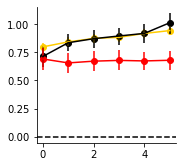

In [149]:
i,j = 2,0
plt.figure(figsize=(2.5,2.5))
iwt = 3
isize = 3
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
this_data = couplings[:,[ilight_halo,ilight_off,ilight_chrimson]][:,:,isize,:,i,j]/phis[:,[ilight_halo,ilight_off,ilight_chrimson]][:,:,isize,:,i]/phis[:,[ilight_halo,ilight_off,ilight_chrimson]][:,:,isize,:,j]
ut.plot_bootstrapped_errorbars_hillel(np.arange(6),this_data,pct=(16,84),colors=colors)
ut.erase_top_right()
plt.axhline(c='k',linestyle='dashed')

0.34541383972937156


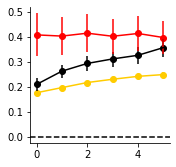

In [150]:
i,j = 2,0
plt.figure(figsize=(2.5,2.5))
iwt = 3
isize = 3
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
this_data = couplings[:,[ilight_halo,ilight_off,ilight_chrimson]][:,:,isize,:,i,j]
ut.plot_bootstrapped_errorbars_hillel(np.arange(6),this_data,pct=(16,84),colors=colors)
ut.erase_top_right()
plt.axhline(c='k',linestyle='dashed')

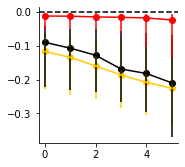

In [151]:
i,j = 1,0
plt.figure(figsize=(2.5,2.5))
iwt = 3
isize = 3
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
this_data = couplings[:,[ilight_halo,ilight_off,ilight_chrimson]][:,:,isize,:,i,j]
ut.plot_pct_errorbars_hillel(np.arange(6),this_data,pct=(16,84),colors=colors)
ut.erase_top_right()
plt.axhline(c='k',linestyle='dashed')

0.7928084063529451


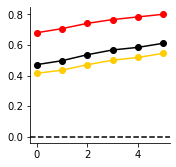

In [152]:
i = 0
plt.figure(figsize=(2.5,2.5))
iwt = 3
isize = 3
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
ut.plot_bootstrapped_errorbars_hillel(np.arange(6),phis[:,[ilight_halo,ilight_off,ilight_chrimson]][:,:,isize,:,i],pct=(16,84),colors=colors)
ut.erase_top_right()
plt.axhline(c='k',linestyle='dashed')

0.695731517470033


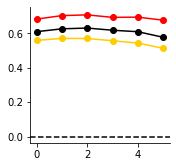

In [153]:
i = 2
plt.figure(figsize=(2.5,2.5))
iwt = 3
isize = 3
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
ut.plot_bootstrapped_errorbars_hillel(np.arange(6),phis[:,[ilight_halo,ilight_off,ilight_chrimson]][:,:,isize,:,i],pct=(16,84),colors=colors)
ut.erase_top_right()
plt.axhline(c='k',linestyle='dashed')

ValueError: num must be 1 <= num <= 100, not 101

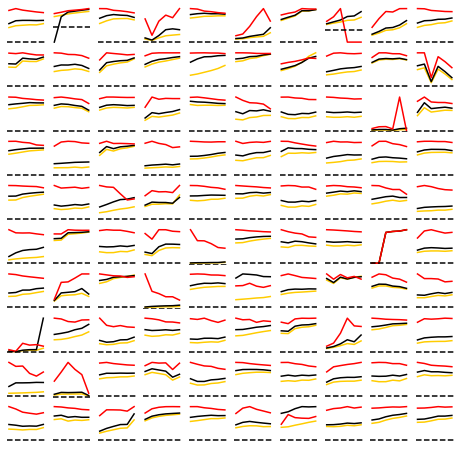

In [154]:
i,j = 0,0
plt.figure(figsize=(8,8))
iwt = 3
isize = 3
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
for iwt in range(nwt):
    plt.subplot(10,10,iwt+1)
    for iilight,ilight in enumerate([ilight_halo,ilight_off,ilight_chrimson]):
        plt.plot(np.arange(6),couplings[iwt,ilight,isize,:,i,j],c=colors[iilight])
    ut.erase_top_right()
    plt.axhline(c='k',linestyle='dashed')
    plt.axis('off')

In [ ]:
i = 0
plt.figure(figsize=(8,8))
iwt = 3
isize = 3
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
for iwt in range(nwt):
    plt.subplot(10,10,iwt+1)
    for iilight,ilight in enumerate([ilight_halo,ilight_off,ilight_chrimson]):
        plt.plot(np.arange(6),phis[iwt,ilight,isize,:,i],c=colors[iilight])
    ut.erase_top_right()
    plt.axhline(c='k',linestyle='dashed')
    plt.axis('off')

In [ ]:
YY_opto_medium.shape

In [155]:
reload(ut)
reload(sca)
average_last = int(np.floor(Niter/5))
lbls = ['PC','SST','VIP','PV']
opto_lbls = ['halo','chrimson']
nopto = len(opto_levels)
ncelltypes = YY_opto_medium[0].shape[-1]
YY_opto_tavg = np.zeros((nwt,nopto,6,6,ncelltypes))
for iwt in range(nwt):
    YY_opto_tavg[iwt] = np.nanmean(YY_opto_medium[iwt][:,:,-average_last:,:],2).reshape((nopto,6,6,ncelltypes))
iwt = -1
ilight1 = 5
for iilight2,ilight2 in enumerate([2,6]):
    for itype in range(3):
        plt.figure(figsize=(12,2))
        for iwt in range(6):#nwt):
            plt.subplot(1,6,iwt+1)
            xdata = YY_opto_tavg[iwt,ilight1,:,:,itype]
            ydata = YY_opto_tavg[iwt,ilight2,:,:,itype]
            sca.scatter_size_contrast(xdata,ydata,mn=0)
            ut.erase_top_right()
#         ut.zero_origin('xy')
            plt.xlabel('%s event rate, \n light off'%lbls[itype])
            plt.ylabel('%s event rate, \n light on'%lbls[itype])
        plt.tight_layout()
#         plt.savefig('figures/finite_%s_%s_scatter_light_on_light_off.eps'%(opto_lbls[iilight2],lbls[itype]))

IndexError: index 38 is out of bounds for axis 0 with size 38

In [156]:
YY_opto_tavg.shape

(134, 21, 6, 6, 8)

In [157]:
np.save('../shared_data/opto_sim_data.npy',{'YY_opto':YY_opto_tavg[low_loss]})

FileNotFoundError: [Errno 2] No such file or directory: '../shared_data/opto_sim_data.npy'

(array([  2.,   1.,   7.,  33., 178., 139.,   8.,   2.,   1.,   1.]),
 array([-0.20508043, -0.16607089, -0.12706134, -0.08805179, -0.04904225,
        -0.0100327 ,  0.02897685,  0.06798639,  0.10699594,  0.14600549,
         0.18501503]),
 <BarContainer object of 10 artists>)

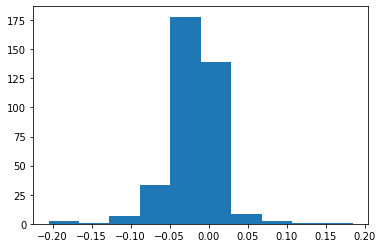

In [158]:
plt.figure()
plt.hist(bltiles[:,0])

In [159]:
plt.figure()
sca.scatter_size_contrast(YY_opto_medium[-1][:,:,:,])

TypeError: scatter_size_contrast() missing 1 required positional argument: 'y2'

<Figure size 432x288 with 0 Axes>

In [160]:
usize = np.array([5,8,13,22,36,60])
ucontrast = np.array([0,6,12,25,50,100])

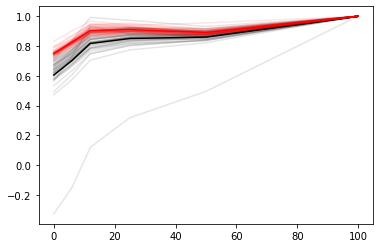

In [161]:
ilights = [5,10]
colors = ['k','r']
isize = -1
plt.figure()
for ilight,color in zip(ilights,colors):
    data = np.nanmean(YY_opto_medium[:,ilight,:,:,0],2).reshape((-1,6,6))
    this_data = data[:,isize,:]/data[:,isize,:].max(1)[:,np.newaxis]
    plt.plot(ucontrast,this_data.T,c=color,alpha=0.1)
    plt.plot(ucontrast,np.mean(this_data,0),c=color)

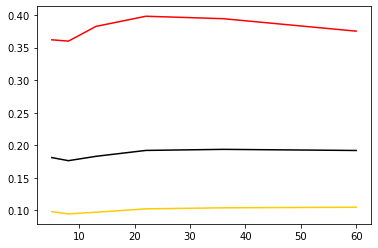

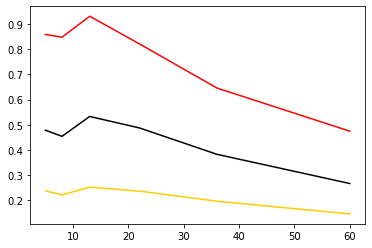

In [162]:
ilights = [1,5,9]
colors = [np.array((1,0.8,0)),'k','r']
nlights = len(ilights)
smi = np.zeros((YY_opto_medium.shape[0],nlights,6))
itype = 0
for iilight,ilight in enumerate(ilights):
    data = np.nanmean(YY_opto_medium[:,ilight,:,:,itype],2).reshape((-1,6,6))
    smi[:,iilight] = data[:,-1,:]/np.max(data,axis=1)
    
for icontrast in [1,5]:
    plt.figure()
    for ilight,color in zip(ilights,colors):
        data = np.nanmean(YY_opto_medium[:,ilight,:,:,itype],2).reshape((-1,6,6))
        this_data = data[:,:,icontrast]#/data[:,:,icontrast].max(1)[:,np.newaxis]
#         plt.plot(usize,this_data.T,c=color,alpha=0.1)
        plt.plot(usize,np.mean(this_data,0),c=color)

IndexError: index 38 is out of bounds for axis 0 with size 38

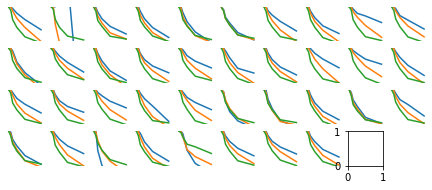

In [163]:
plt.figure(figsize=(7.5,7.5))
for iwt in range(nwt):
    plt.subplot(10,10,iwt+1)
    plt.plot(ucontrast,smi[iwt,:,:].T)
    plt.ylim((0.5,1))
    plt.axis('off')

In [41]:
plt.figure()
plt.plot(ucontrast,smi[68].T)

NameError: name 'smi' is not defined

<Figure size 432x288 with 0 Axes>

/Users/agos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


IndexError: index 38 is out of bounds for axis 0 with size 38

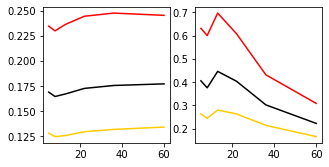

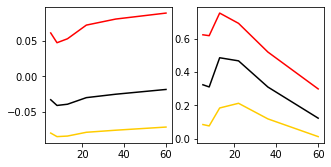

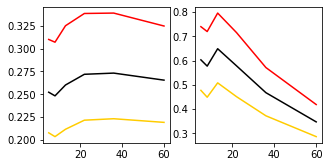

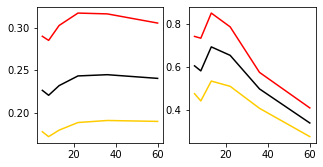

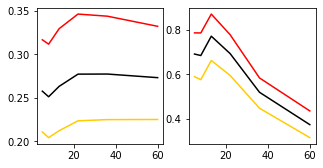

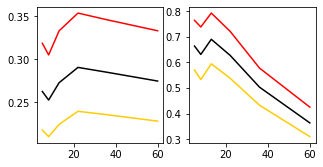

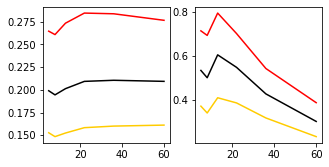

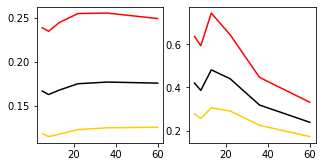

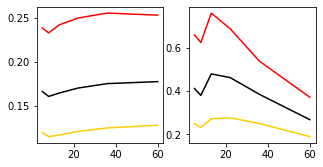

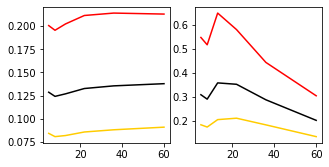

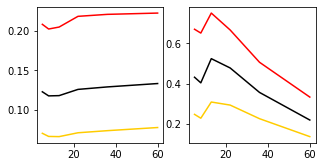

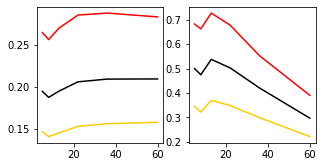

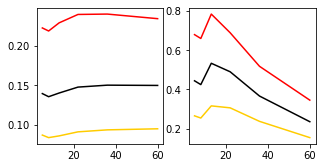

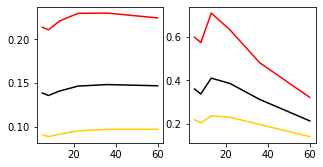

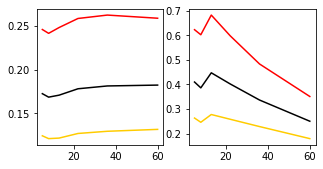

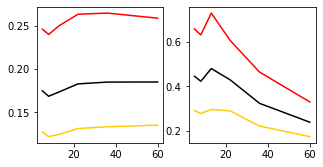

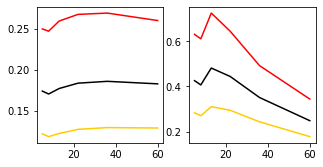

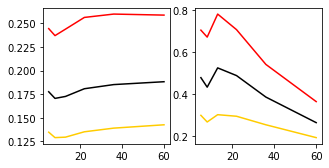

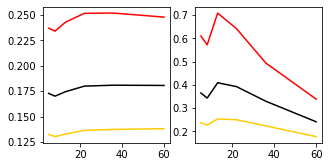

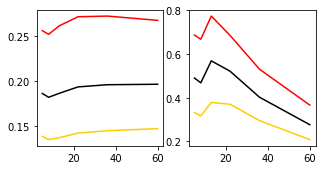

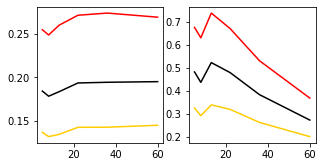

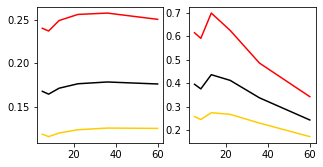

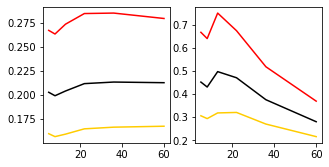

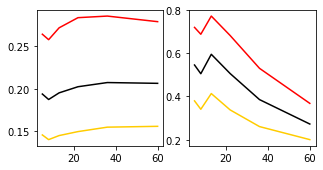

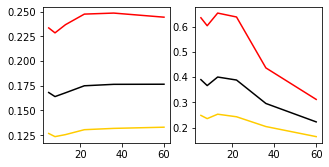

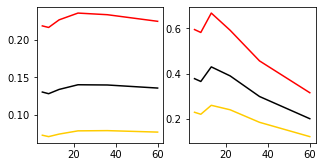

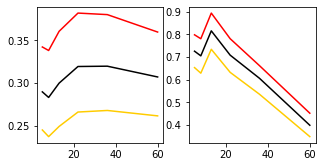

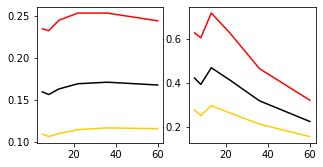

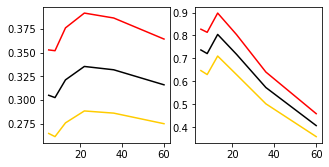

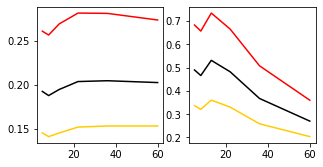

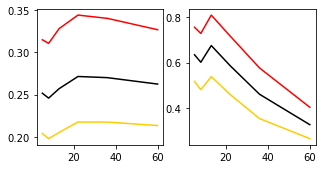

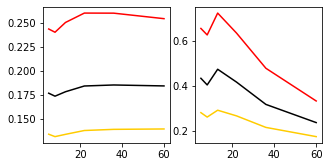

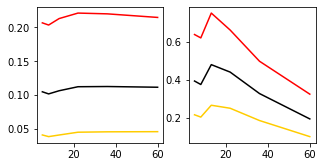

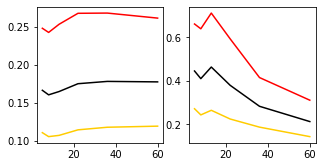

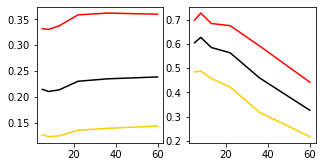

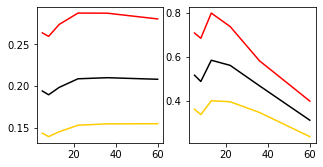

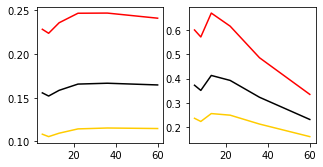

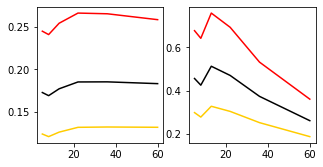

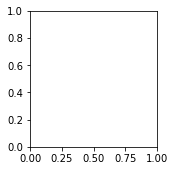

In [164]:
for iwt in range(nwt):
    ilights = [3,5,7]
    colors = [np.array((1,0.8,0)),'k','r']
    nlights = len(ilights)

    plt.figure(figsize=(5,2.5))
    for iicontrast,icontrast in enumerate([1,5]):
        plt.subplot(1,2,iicontrast+1)
        for ilight,color in zip(ilights,colors):
            data = np.nanmean(YY_opto_medium[iwt,ilight,:,:,itype],1).reshape((-1,6,6))
            this_data = data[:,:,icontrast]#/data[:,:,icontrast].max(1)[:,np.newaxis]
    #         plt.plot(usize,this_data.T,c=color,alpha=0.1)
            plt.plot(usize,np.nanmean(this_data,0),c=color)

In [165]:
np.nanmean(YY_opto_medium[:,:,:,:,itype],3).reshape((nwt,-1,6,6))[:,:,[0,2,3,5],:].shape

ValueError: cannot reshape array of size 28728 into shape (134,newaxis,6,6)

In [166]:
data = np.nanmean(YY_opto_medium[:,2:8,:,:,itype],3).reshape((nwt,-1,6,6))[:,:,[0,2,3,5],:]
nsize,ncontrast = 4,6
mn = np.nanmean(data,0).min()
mx = np.nanmean(data,0).max()
plt.figure()
for isize in range(nsize):
    for icontrast in range(ncontrast):
        plt.subplot(nsize,ncontrast,(nsize-isize-1)*ncontrast+icontrast+1)
        plt.plot(data[:,:,isize,icontrast].T,c='k',alpha=0.02)
        plt.plot(np.nanmean(data[:,:,isize,icontrast],0),c='k')
        plt.ylim((mn,mx))
        plt.axis('off')
plt.savefig('figures/vip_sim_master_plot.jpg',dpi=300)

ValueError: cannot reshape array of size 8208 into shape (134,newaxis,6,6)

In [167]:
YY_opto_medium[0,7,:,:,itype]

array([[0.21617465, 0.21617465, 0.21617465, ..., 0.21617465, 0.21617465,
        0.21617465],
       [0.23476653, 0.23476653, 0.23476653, ..., 0.23476653, 0.23476653,
        0.23476653],
       [0.26482173, 0.26482173, 0.26482173, ..., 0.26482173, 0.26482173,
        0.26482173],
       ...,
       [0.28377307, 0.28377307, 0.28377307, ..., 0.28377307, 0.28377307,
        0.28377307],
       [0.27968718, 0.27968718, 0.27968718, ..., 0.27968718, 0.27968718,
        0.27968718],
       [0.30885622, 0.30885622, 0.30885622, ..., 0.30885622, 0.30885622,
        0.30885622]])

In [46]:
# for iwt in range(nwt):
#     plt.figure()
#     for ilight,isize,icontrast in zip([0,5,10],[4,4,4],[5,5,5]):
#         tmax = Niter
#         t = np.arange(tmax)*dt
#         iflat = np.ravel_multi_index((isize,icontrast),(nsize,ncontrast))
#         plt.plot(t,YY_opto[iwt][ilight,iflat,:tmax,0].T)

In [47]:
np.nanmax(data)

NameError: name 'data' is not defined

In [168]:
iwt = 0
data = np.zeros((nwt,YY_opto_medium[0].shape[0],6,6))
these_lvls = slice(None)
for itype in [0,1,2,3]:
    plt.figure(figsize=(7.5,2.5))
    isize = 3
    tlast = 1000
    icontrasts = [1,5]
    for iwt in range(nwt):
        data[iwt] = np.nanmean(YY_opto_medium[iwt][:,:,:,itype],2).reshape((-1,6,6)) # light, stim, time, type
        data[iwt] = (data[iwt] - data[iwt,5])/(data[iwt] + data[iwt,5])
    for iicontrast,icontrast in enumerate(icontrasts):
        this_data = data[:,:,isize,icontrast]
        plt.subplot(1,3,iicontrast+1)
        for iwt in range(nwt):
            plt.plot(opto_levels[these_lvls],this_data[iwt][these_lvls],c='k',alpha=1)
        plt.plot(opto_levels[these_lvls],np.mean(this_data,0)[these_lvls],c='k')
        plt.ylim((np.nanmin(data[:,:,isize,icontrasts]),np.nanmax(data[:,:,isize,icontrasts])))
        plt.axhline(0,c='k',linestyle='dashed')
        plt.ylim(-1,1)
        plt.subplot(1,3,3)
        mn = np.mean(this_data,0)[these_lvls]
        sem = np.std(this_data,0)[these_lvls]/np.sqrt(this_data.shape[0])
        plt.plot(opto_levels[these_lvls],mn)
        plt.fill_between(opto_levels[these_lvls],mn-sem,mn+sem,alpha=0.5)
        plt.ylim((np.nanmin(data[:,:,isize,icontrasts]),np.nanmax(data[:,:,isize,icontrasts])))
        plt.axhline(0,c='k',linestyle='dashed')
        plt.ylim(-1,1)
    plt.tight_layout()

IndexError: index 38 is out of bounds for axis 0 with size 38

<Figure size 540x180 with 0 Axes>

In [49]:
non_paradoxical = (YY_opto_small[:,10,:,1] - YY_opto_small[:,5,:,1]>0).sum(1) == 0

NameError: name 'YY_opto_small' is not defined

In [ ]:
iwt,ilight = 0,-1
thisYY = np.nanmean(YY_opto[iwt,:,:,:],2)
mdls[0].fprimeY(thisYY).shap

In [ ]:
YY_opto.shape

In [50]:
this_fprime = mdls[0].fprimeY(np.nanmean(YY_opto[iwt],2))
this_fprime.shape

IndexError: list index out of range

In [51]:
nlight = YY_opto_medium.shape[1]
nN,nP,nQ,nS,nT = [getattr(mdls[0],x) for x in ['nN','nP','nQ','nS','nT']]
phis = np.zeros((nwt,nlight,6,6,nQ*nS*nT))
couplings = np.zeros((nwt,nlight,6,6,nQ*nS*nT,nQ*nS*nT))
Xcouplings = np.zeros((nwt,nlight,6,6,nP*nS*nT,nQ*nS*nT))
for iwt,mdl in enumerate(mdls[:nwt]):
    print('model #%d'%iwt)
    this_fprime = mdl.fprimeY(np.nanmean(YY_opto_medium[iwt],2))
    WWmx,WWmy = [getattr(mdls[iwt],x) for x in ['WWmx','WWmy']]
    for ilight in range(nlight):
        for istim in range(nN):
            iistim,jjstim = np.unravel_index(istim,(6,6))
            phis[iwt,ilight,iistim,jjstim] = this_fprime[ilight,istim]
            Phi = np.diag(phis[iwt,ilight,iistim,jjstim])
            couplings[iwt,ilight,iistim,jjstim] = Phi @ np.linalg.inv(np.eye(nQ*nS*nT) - WWmy @ Phi)
            Xcouplings[iwt,ilight,iistim,jjstim] = WWmx @ Phi @ np.linalg.inv(np.eye(nQ*nS*nT) - WWmy @ Phi)
# couplings = np.reshape(couplings,(couplings.shape[0],6,6,couplings.shape[2],couplings.shape[3]))
# Xcouplings = np.reshape(Xcouplings,(Xcouplings.shape[0],6,6,Xcouplings.shape[2],Xcouplings.shape[3]))


NameError: name 'YY_opto_medium' is not defined

In [52]:
lbls = ['PC','SST','VIP','PV']

In [53]:
iwt = 1

NameError: name 'couplings' is not defined

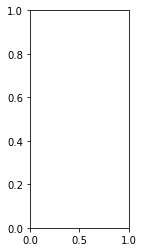

In [54]:
plt.figure()
for ilight in range(3):
    plt.subplot(1,3,ilight+1)
    data = couplings[iwt,5*ilight,:,:,1,1]
    mx = np.max(np.abs(data))
    plt.imshow(data,vmin=-mx,vmax=mx,cmap='bwr')

In [ ]:
plt.figure()
for ilight in range(3):
    plt.subplot(1,3,ilight+1)
    data = couplings[iwt,5*ilight,:,:,2,1]
    mx = np.max(np.abs(data))
    plt.imshow(data,vmin=-mx,vmax=mx,cmap='bwr')

In [ ]:
plt.figure()
for ilight in range(3):
    plt.subplot(1,3,ilight+1)
    data = couplings[iwt,5*ilight,:,:,2,0]
    mx = np.max(np.abs(data))
    plt.imshow(data,vmin=-mx,vmax=mx,cmap='bwr')

NameError: name 'couplings' is not defined

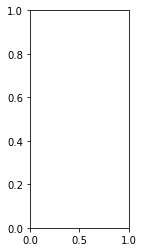

In [55]:
plt.figure()
for ilight in range(3):
    plt.subplot(1,3,ilight+1)
    data = couplings[1,5*ilight,:,:,8,0]
    mx = np.max(np.abs(data))
    plt.imshow(data,vmin=-mx,vmax=mx,cmap='bwr')

In [ ]:
for itype1 in range(nQ):
    for itype2 in range(nQ):
        plt.figure()
        data = np.nanmedian(couplings[:,:,:,:,itype1,itype2],0)
        mx = np.max(np.abs(data))
        for ilight in range(3):
            plt.subplot(1,3,ilight+1)
            this_data = data[5*ilight]
            plt.imshow(this_data,vmin=-mx,vmax=mx,cmap='bwr')
        plt.subplot(1,3,2)
        plt.title('%s->%s'%(lbls[itype1],lbls[itype2]))

In [ ]:
for itype1 in range(nQ):
    for itype2 in range(nQ):
        plt.figure()
        data = np.nanmedian(couplings[:,:,:,:,8+itype1,itype2],0)
        mx = np.max(np.abs(data))
        for ilight in range(3):
            plt.subplot(1,3,ilight+1)
            this_data = data[5*ilight]
            plt.imshow(this_data,vmin=-mx,vmax=mx,cmap='bwr')
        plt.subplot(1,3,2)
        plt.title('far %s->%s'%(lbls[itype1],lbls[itype2]))

In [56]:
for itype1 in range(nQ):
    for itype2 in range(nQ):
        plt.figure()
        data = np.nanmedian(couplings[:,:,:,:,8+itype1,itype2],0)
        mx = np.max(np.abs(data))
        for ilight in range(3):
            plt.subplot(1,3,ilight+1)
            this_data = data[5+2*(ilight-1)]
            plt.imshow(this_data,vmin=-mx,vmax=mx,cmap='bwr')
        plt.subplot(1,3,2)
        plt.title('far %s->%s'%(lbls[itype1],lbls[itype2]))

NameError: name 'nQ' is not defined

In [57]:
plt.figure()
isize = 4
x = np.arange(6)
ut.plot_bootstrapped_errorbars_hillel(x,couplings[:,[3,5,7],isize,:,8,0].transpose((1,0,2)))

NameError: name 'couplings' is not defined

<Figure size 432x288 with 0 Axes>

In [58]:
nlight = YY_opto_medium.shape[1]
nsize,ncontrast = 6,6
nN,nP,nQ,nS,nT = [getattr(mdls[0],x) for x in ['nN','nP','nQ','nS','nT']]
max_eig = np.zeros((len(weights_files),nlight,nsize,ncontrast))
min_eig = np.zeros((len(weights_files),nlight,nsize,ncontrast))
vs = np.zeros((len(weights_files),nlight,nsize,ncontrast,2,2))
for iwt,mdl in enumerate(mdls[:nwt]):
    print('model #%d'%iwt)
    this_fprime = mdl.fprimeY(np.nanmean(YY_opto_medium[iwt],2))
    Wmy = getattr(mdls[iwt],'Wmy')
    for ilight in range(nlight):
        Weff = np.zeros((nsize,ncontrast,2,2))
        for istim in range(nN):
            iistim,jjstim = np.unravel_index(istim,(nsize,ncontrast))
            these_phis = this_fprime[ilight,istim]
            Phi = np.diag(these_phis)
            Weff[iistim,jjstim] = Wmy[[0,3]][:,[0,3]] @ Phi[[0,3]][:,[0,3]]
        for istim in range(nN):
            iistim,jjstim = np.unravel_index(istim,(nsize,ncontrast))
    #         plt.subplot(nsize,ncontrast,istim+1)
    #         plt.imshow(Weff[iistim,jjstim],vmin=Weff.min(),vmax=Weff.max())
            w,v = np.linalg.eig(Weff[iistim,jjstim].T)
            vs[iwt,ilight,iistim,jjstim] = v[:,np.argsort(w)]
            max_eig[iwt,ilight,iistim,jjstim] = np.max(w)
            min_eig[iwt,ilight,iistim,jjstim] = np.min(w)

NameError: name 'YY_opto_medium' is not defined

NameError: name 'max_eig' is not defined

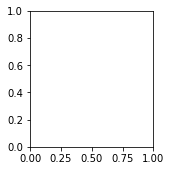

In [59]:
iwt = 0
usize = np.array([5,8,13,22,36,60])
plt.figure(figsize=(7.5,2.5))
for isize in range(3):
    plt.subplot(1,3,isize+1)
    plt.plot(usize,np.nanmean(max_eig[:,1+4*isize][:,:,[1,3,5]],0))
    plt.ylim((max_eig[iwt].min(),max_eig[iwt].max()))

In [ ]:
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_l23 = np.array(((0.5,0.5,0.5),(0.25,0.25,0.25),(0.,0.,0.)))
for iilight,ilight in enumerate([5,3,7]):
    plt.subplot(1,3,iilight+1)
    ut.plot_bootstrapped_errorbars_hillel(usize,max_eig[:,ilight][:,:,[1,3,5]].transpose((0,2,1)),pct=(2.5,97.5),colors=c_l23)
    plt.axhline(1,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    # plt.legend(['6%','25%','100%'])
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
#     plt.ylim((0.4,1.3))
plt.subplot(1,3,1)
plt.ylabel('max. PC-PV eigenvalue')

plt.tight_layout()
# plt.savefig('figures/pc_pv_stability_size_by_3_contrasts_by_vip_opto.eps')

In [ ]:
plt.figure(figsize=(2.5,2.5))
isize = 3
ilight = 5
datas = [couplings[:,ilight,isize,:,1,0],couplings[:,ilight,isize,:,3,0]]
colors = [np.array((1,0.65,0)),np.array((0,0,1))]
for data,color in zip(datas,colors):
    mx = np.max(np.abs(data),axis=1)[:,np.newaxis]
    ut.plot_bootstrapped_errorbars_hillel(ucontrast,(data/mx)[:,np.newaxis],pct=(2.5,97.5),colors=color[np.newaxis])
plt.legend([r'SST$\rightarrow$PC',r'PV$\rightarrow$PC'])
for data,color in zip(datas,colors):
    mx = np.max(np.abs(data),axis=1)[:,np.newaxis]
    plt.plot(ucontrast,(data/mx).T,alpha=0.1,c=color)
plt.xlabel('contrast (%)')
plt.ylabel('norm. coupling strength')
plt.title('%d$^o$ size'%usize[isize])
plt.axhline(0,linestyle='dashed',c='k')
ut.erase_top_right()
plt.tight_layout()
# plt.savefig('figures/sst_pc_coupling_traces.jpg',dpi=300)

In [60]:
max_eig[:,3+2*isize,:,[1,3,5]].shape

NameError: name 'max_eig' is not defined

In [61]:
for itype1 in range(nP):
    for itype2 in range(nQ):
        plt.figure()
        data = np.nanmedian(Xcouplings[:,:,:,:,4+itype1,itype2],0)
        mx = np.max(np.abs(data))
        for ilight in range(3):
            plt.subplot(1,3,ilight+1)
            this_data = data[5*ilight]
            plt.imshow(this_data,vmin=-mx,vmax=mx,cmap='bwr')
        plt.subplot(1,3,2)
        plt.title('far %s->%s'%(lbls[itype1],lbls[itype2]))

NameError: name 'nP' is not defined

In [62]:
plt.figure()
mx = np.max(np.abs(couplings[:,10,:,:,1,1]))
for iwt in range(nwt):
    plt.subplot(10,10,iwt+1)
    plt.imshow(couplings[iwt,10,:,:,1,1],vmin=-mx,vmax=mx,cmap='bwr')
#     plt.axis('off')
cp = couplings.reshape((nwt,-1))
lkat = np.ones((nwt,),dtype='bool')
# lkat = np.max(np.abs(cp),axis=1)<50

NameError: name 'couplings' is not defined

<Figure size 432x288 with 0 Axes>

NameError: name 'couplings' is not defined

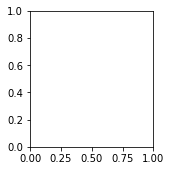

In [63]:
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for ilight in range(3):
    plt.subplot(1,3,ilight+1)
    ut.plot_bootstrapped_errorbars_hillel(usize,couplings[:,1+4*ilight,:,:,1,1][:,:,[1,3,5]].transpose((0,2,1)),pct=(2.5,97.5),colors=c_sst)
    plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('SST-SST coupling')
    plt.legend(['6%','25%','100%'])
    plt.tight_layout()
# plt.savefig('figures/sst_sst_coupling_size_by_3_contrasts_by_3_light_levels.eps')

In [ ]:
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for ilight in range(3):
    plt.subplot(1,3,ilight+1)
    ut.plot_bootstrapped_errorbars_hillel(usize,couplings[lkat,3+2*ilight,:,:,2,2][:,:,[1,3,5]].transpose((0,2,1)),pct=(2.5,97.5),colors=c_vip)
    plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('VIP-VIP coupling')
    plt.legend(['6%','25%','100%'])
    plt.tight_layout()
# plt.savefig('figures/vip_sst_coupling_size_by_3_contrasts_by_3_light_levels.eps')

In [ ]:
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for ilight in range(3):
    plt.subplot(1,3,ilight+1)
    ut.plot_bootstrapped_errorbars_hillel(usize,couplings[lkat,1+4*ilight,:,:,2,1][:,:,[1,3,5]].transpose((0,2,1)),pct=(2.5,97.5),colors=c_vip)
    plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('VIP-SST coupling')
    plt.legend(['6%','25%','100%'])
    plt.tight_layout()
# plt.savefig('figures/vip_sst_coupling_size_by_3_contrasts_by_3_light_levels.eps')

NameError: name 'couplings' is not defined

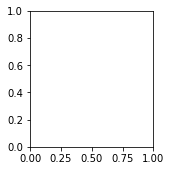

In [64]:
reload(ut)
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for iilight,ilight in enumerate([5,1,9]):
    plt.subplot(1,3,iilight+1)
    ut.plot_pct_errorbars_hillel(usize,couplings[:,ilight,:,:,2,0][:,:,[1,3,5]].transpose((0,2,1)),pct=(16,84),colors=c_vip)
    plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('VIP-PC coupling')
    plt.legend(['6%','25%','100%'])
    ut.erase_top_right()
    plt.tight_layout()
    plt.ylim(-0.05,0.5)
# plt.savefig('figures/vip_pc_coupling_size_by_3_contrasts_by_3_light_levels.eps')

In [ ]:
reload(ut)
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for iilight,ilight in enumerate([5,1,9]):
    plt.subplot(1,3,iilight+1)
    ut.plot_pct_errorbars_hillel(usize,couplings[:,ilight,:,:,8,0][:,:,[1,3,5]].transpose((0,2,1)),pct=(16,84),colors=c_l23)
    plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('VIP-PC coupling')
#     plt.legend(['6%','25%','100%'])
    ut.erase_top_right()
    plt.tight_layout()
    plt.ylim(-7.5,1)
# plt.savefig('figures/vip_pc_coupling_size_by_3_contrasts_by_3_light_levels.eps')

In [ ]:
sc = YY_opto_small.reshape(YY_opto_small.shape[:2]+(6,6,-1))

In [ ]:
smi = sc[:,:,-1,1:,0]/np.max(sc[:,:,:,1:,0],axis=2)

In [ ]:
plt.figure()
for ilight in [5,1,9]:
    plt.plot(np.nanmean(smi[:,ilight,:],0))

NameError: name 'YY_opto_small' is not defined

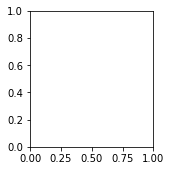

In [65]:
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for iilight,ilight in enumerate([5,1,9]):
    plt.subplot(1,3,iilight+1)
    ut.plot_bootstrapped_errorbars_hillel(usize,YY_opto_small[:,ilight,:,0].reshape((-1,6,6))[:,:,[1,3,5]].transpose((0,2,1)),pct=(2.5,97.5),colors=c_l23)
#     plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('modeled PC FR (a.u.)')
    plt.legend(['6%','25%','100%'])
    ut.erase_top_right()
    plt.ylim(0.2,1.5)
plt.tight_layout()
# plt.savefig('figures/modeled_pc_size_by_3_contrasts_by_3_light_levels.eps')

In [ ]:
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for iilight,ilight in enumerate([5,1,9]):
    plt.subplot(1,3,iilight+1)
    ut.plot_bootstrapped_errorbars_hillel(usize,YY_opto_small[:,ilight,:,2].reshape((-1,6,6))[:,:,[1,3,5]].transpose((0,2,1)),pct=(2.5,97.5),colors=c_vip)
#     plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('modeled VIP FR (a.u.)')
    plt.legend(['6%','25%','100%'])
    ut.erase_top_right()
    plt.tight_layout()
    plt.ylim(0.,1.8)
# plt.savefig('figures/modeled_vip_size_by_3_contrasts_by_3_light_levels.eps')

In [ ]:
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for iilight,ilight in enumerate([5,1,9]):
    plt.subplot(1,3,iilight+1)
    ut.plot_bootstrapped_errorbars_hillel(usize,phis[:,ilight,:,:,0][:,:,[1,3,5]].transpose((0,2,1)),pct=(2.5,97.5),colors=c_l23)
#     plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('modeled PC FR (a.u.)')
    plt.legend(['6%','25%','100%'])
    plt.tight_layout()
    plt.ylim(0.2,1.5)
# plt.savefig('figures/modeled_pc_size_by_3_contrasts_by_3_light_levels.eps')

In [66]:
phis.shape

NameError: name 'phis' is not defined

In [67]:
couplings.shape

NameError: name 'couplings' is not defined

In [68]:
c_l4 = np.array(((0,0.3,0),(0,0.6,0),(0,1,0)))
c_l23 = np.array(((0.5,0.5,0.5),(0.25,0.25,0.25),(0.,0.,0.)))
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
c_vip = np.array(((0.3,0,0.3),(0.6,0,0.6),(1,0,1)))
c_pv = np.array(((0,0,0.3),(0,0,0.6),(0,0,1)))
colors = [c_l4,c_l23,c_sst,c_vip,c_pv]

NameError: name 'couplings' is not defined

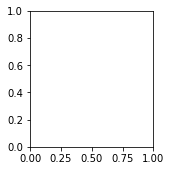

In [69]:
plt.figure(figsize=(7.5,2.5))
usize = [5,8,13,22,36,60]
c_sst = np.array(((0.3,0.2,0),(0.6,0.4,0),(1,0.65,0)))
for ilight in range(3):
    plt.subplot(1,3,ilight+1)
    ut.plot_bootstrapped_errorbars_hillel(usize,couplings[lkat,5*ilight,:,:,1,0][:,:,[1,3,5]].transpose((0,2,1)),pct=(2.5,97.5),colors=c_sst)
    plt.axhline(0,linestyle='dashed',c='k')
    plt.xlabel('size ($^o$)')
    plt.ylabel('SST-PC coupling')
    plt.legend(['6%','25%','100%'])
    plt.tight_layout()
# plt.savefig('figures/sst_sst_coupling_size_by_3_contrasts.eps')

IndexError: index 8 is out of bounds for axis 4 with size 8

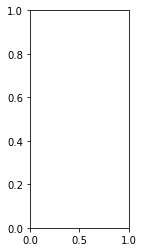

In [175]:
for itype1 in range(8,9):
    for itype2 in range(0,1):
        plt.figure()
        for ilight in range(3):
            plt.subplot(1,3,ilight+1)
            data = np.nanmedian(couplings[:,5*ilight,:,:,itype1,itype2],0)
            mx = np.max(np.abs(data))
            plt.imshow(data,vmin=-mx,vmax=mx,cmap='bwr')
        plt.subplot(1,3,2)
        plt.title('%s->%s'%('far PC',lbls[itype2]))

In [176]:
ucontrast = np.array([0,6,12,25,50,100])

In [179]:
YY_opto_medium.shape

(38, 21, 36, 101, 8)

In [181]:
nwt=38

IndexError: string index out of range

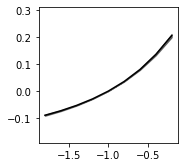

In [182]:
iwt = 0
data = np.zeros((nwt,YY_opto_medium[0].shape[0],6,6))
yoffset = 0.1
opto_range = slice(1,10)
these_opto_levels = opto_levels[opto_range]
for itype in [0,1,2,3]:
    plt.figure(figsize=(2.5,2.5))
    isize = 3
    tlast = 200
    icontrasts = [1,3,5]
    these_colors = colors[itype+1]
    for iwt in range(nwt):
        data[iwt] = np.nanmean(YY_opto_medium[iwt][:,:,-tlast:,itype],2).reshape((-1,6,6)) # light, stim, time, type
        data[iwt] = (data[iwt] - data[iwt,5])#/(data[iwt] + data[iwt,5])
    for iicontrast,icontrast in enumerate(icontrasts):
        this_data = data[:,:,isize,icontrast]
        this_color = these_colors[iicontrast]
        mn = np.mean(this_data,0)[opto_range]
        sem = np.std(this_data,0)[opto_range]/np.sqrt(this_data.shape[0])
        plt.plot(these_opto_levels,mn,c=this_color)
        plt.fill_between(these_opto_levels,mn-sem,mn+sem,alpha=0.5,color=this_color)
        plt.ylim(((mn-sem-yoffset).min(),(mn+sem+yoffset).max()))
#     plt.legend(['%d%% contrast'%uc for uc in ucontrast[icontrasts]])
    plt.title('%d$^o$ size'%usize[isize])
    plt.axhline(0,c='k',linestyle='dashed')
    plt.xlabel('VIP current injection')
    plt.ylabel('$\Delta$%s firing rate'%lbls[itype])
    ut.erase_top_right()
    plt.tight_layout()
#     plt.savefig('figures/%s_vip_current_injection.jpg'%lbls[itype],dpi=300)

In [70]:
import calnet.utils
import sim_utils

In [71]:
nfiles = nwt#len(weights_files)
Ts = np.zeros((nfiles,nQ))
Ks = np.zeros((nfiles,nQ))
Wmys = np.zeros((nfiles,nQ,nQ))
Wmxs = np.zeros((nfiles,nP,nQ))
s02s = np.zeros((nfiles,nQ))
YYs = np.zeros((nfiles,6,6,nQ*nS*nT))
XXs = np.zeros((nfiles,6,6,nP*nS*nT))
couplings = np.zeros((nfiles,6,6,nQ*nS*nT,nQ*nS*nT))
Xcouplings = np.zeros((nfiles,6,6,nP*nS*nT,nQ*nS*nT))
for iwt,weights_file in enumerate(weights_files):
    Wstar_dict = np.load(weights_file,allow_pickle=True)[()]
    Wmx,Wmy,Wsx,Wsy,s02,K,kappa,T,XX,XXp,Eta,Xi,h = Wstar_dict['as_list']
    WWmy = calnet.utils.gen_Weight_k_kappa_t(Wmy,K,kappa,T)
    WWmx = calnet.utils.gen_Weight_k_kappa_t(Wmx,K,kappa,T)
    tiled_s02 = np.tile(s02,nS*nT)
    Ts[iwt] = T
    Ks[iwt] = K
    Wmys[iwt] = Wmy
    Wmxs[iwt] = Wmx
    s02s[iwt] = s02
    YYs[iwt] = sim_utils.f_miller_troyer(Eta,Xi**2+tiled_s02).reshape((6,6,nQ*nS*nT))
    XXs[iwt] = XX.reshape((6,6,nP*nS*nT))
    for istim in range(nN):
        iistim,jjstim = np.unravel_index(istim,(6,6))
        Phi = np.diag(calnet.utils.fprime_miller_troyer(Eta[istim],Xi[istim]**2+tiled_s02))
        couplings[iwt,iistim,jjstim] = Phi @ np.linalg.inv(np.eye(nQ*nS*nT) - WWmy @ Phi)
        Xcouplings[iwt,iistim,jjstim] = WWmx @ Phi @ np.linalg.inv(np.eye(nQ*nS*nT) - WWmy @ Phi)
# couplings = np.reshape(couplings,(couplings.shape[0],6,6,couplings.shape[2],couplings.shape[3]))
# Xcouplings = np.reshape(Xcouplings,(Xcouplings.shape[0],6,6,Xcouplings.shape[2],Xcouplings.shape[3]))

NameError: name 'nQ' is not defined

ValueError: x and y must have same first dimension, but have shapes (21,) and (1736,)

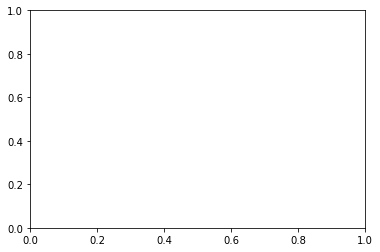

In [72]:
for itype in [0,1,2]:
    plt.figure()
    isize = 5
    tlast = 1000
    data = np.nanmean(YY_opto[:,:,-tlast:,itype],2).reshape((-1,6,6)) # light, stim, time, type
    for icontrast in [1,3,5]:
        plt.plot(opto_levels,data[:,isize,icontrast]-data[10,isize,icontrast])

In [ ]:
plt.figure()
itype = 0
isize = 2
tlast = 1000
data = np.nanmean(YY_opto[:,:,-tlast:,itype],2).reshape((-1,6,6)) # light, stim, time, type
for icontrast in [1,3,5]:
    plt.plot(opto_levels,data[:,isize,icontrast]-data[10,isize,icontrast])

In [ ]:
plt.figure()
itype = 0
isize = 5
tlast = 1000
data = np.nanmean(YY_opto[:,:,-tlast:,itype],2).reshape((-1,6,6)) # light, stim, time, type
for icontrast in [1,3,5]:
    plt.plot(opto_levels,data[:,isize,icontrast]-data[10,isize,icontrast])

In [ ]:
pdb.pm()


In [73]:
reload(dyn)
YY_fix = dyn.compute_steady_state_Model(mdl,Niter=int(1.5e3),fix_dim=np.arange(mdl.nQ),Ny=25,dt=1e-1)

NameError: name 'mdl' is not defined

In [74]:
import pyute as ut
# ut.mkdir('figures/dynamics_simulations/200724a/')
for iwt in range(nwt):
    mag = 1.5
    plt.figure(figsize=(6*mag,6*mag))
    for icelltype in range(4):
        for istim in range(36):
            plt.subplot(6,6,istim+1)
            plt.plot(YY_ss[iwt][istim,:,icelltype]) #-YY_ss[imodel][istim,-1,icelltype])
            plt.ylim((0,1.5))
#     plt.savefig('figures/dynamics_simulations/200724a/%d.jpg'%iwt)

In [75]:
colors = plt.cm.viridis(np.linspace(0,1,6))
ut.mkdir('figures/dynamics_simulations_inset')
for iwt in range(nwt):
    plt.figure()
    tlim = 1001
    t = np.arange(tlim)*dt
    data = YY_ss[iwt].reshape((6,6)+YY_ss[iwt].shape[1:])
    itype = 0
    icontrast = 5
    for isize in np.arange(6):
        plt.plot(t,data[isize,icontrast,:tlim,itype],c=colors[isize])
    plt.xlabel('t (membrane time constants)')
    plt.ylabel('firing rate (a.u.)')
#     plt.savefig('figures/dynamics_simulations_inset/%d.jpg'%iwt)

FileNotFoundError: [Errno 2] No such file or directory: 'figures/dynamics_simulations_inset'

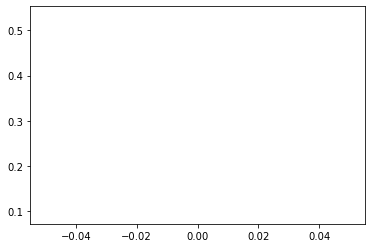

In [76]:
plt.figure()
for ilight in [0,5,10]:
    plt.plot(YY_opto[0,ilight,-1,:,0])

NameError: name 'YY_ss' is not defined

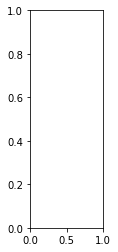

In [77]:
for itype in range(4):
    plt.subplot(1,4,itype+1)
    plt.imshow(YY_ss[:,-1,itype].reshape((6,6)))

In [ ]:
mag = 2
ix = 0
iy = 1
max_val = 2.5
Ny = 25
xvals = np.linspace(0,max_val,Ny)
plt.figure(figsize=(6*mag,6*mag))
for istim in range(YY_fix.shape[1]):
    plt.subplot(6,6,istim+1)
    for it in [-400,-300,-200,-100,-1]:
        plt.plot(YY_fix[iy,istim,:,it,ix],xvals,c='C0')
        plt.plot(xvals,YY_fix[ix,istim,:,it,iy],c='C1')
        plt.xlim((0,1.25))
        plt.ylim((0,1.25))
plt.tight_layout()

In [ ]:
def f_basic(mu,sigma=1):
    return utils.f_miller_troyer(mu,sigma)
def run_small_sim(W,h,r0,f=f_basic,Niter=int(1e3),dt=1e-1):
    def drdt(r):
        return -r + f(r @ W + h)
    r = r0
    for t in range(Niter):
        r = r + dt*drdt(r)
    return r
    

In [ ]:
# W = np.array(((1,2),(-3,-2)))
W = 2*np.array(((1,1),(-2,-1)))
# hs = [np.array((1,0.99)),np.array((1,1)),np.array((1,1.01))]
hs = [np.array((1,0.49)),np.array((1,0.75)),np.array((1,0.51))]
# h2 = np.array((1,1.25))
r0 = np.array((1,1))
nstim = 100
inputs = np.linspace(-2,2,nstim)
rs = [np.zeros((nstim,2)) for h in hs]
for iinp in range(len(hs)):
    for istim in range(nstim):
        rs[iinp][istim] = run_small_sim(W,hs[iinp]*inputs[istim],r0,f=lambda mu: utils.f_miller_troyer(mu,0.05))
        r0 = rs[iinp][istim].copy()

In [ ]:
ww,vv = np.linalg.eig(W.T)

In [ ]:
-h2 @ np.linalg.inv(W-1)

In [ ]:
for iinp in (1,): #range(len(hs)):
    plt.figure()
    plt.plot(inputs,rs[iinp]/rs[iinp].max(0)[np.newaxis,:])
    plt.legend(['model PC','model PV'])
    plt.xlabel('input strength')
    plt.ylabel('firing rate / max firing rate')
plt.savefig('figures/toy_model_pc_pv.jpg',dpi=300)

In [78]:
for iinp in range(len(hs)):
    plt.figure()
    plt.plot(inputs,rs[iinp]/rs[iinp].max(0)[np.newaxis,:])
# plt.plot(inputs,r2)

NameError: name 'hs' is not defined

In [79]:
plt.figure()
plt.plot(inputs,r2/r2.max(0)[np.newaxis,:])

NameError: name 'inputs' is not defined

<Figure size 432x288 with 0 Axes>

In [80]:
plt.figure()
plt.plot(r[:,0],-inputs,c='k')
plt.plot(r[:,1],-inputs,c='b')
plt.xlim((0,0.04))

NameError: name 'r' is not defined

<Figure size 432x288 with 0 Axes>